In [62]:
import yfinance as yf
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import SGDClassifier,ElasticNet

### Preprocessing

In [42]:
app_train = pd.read_csv(r'C:\Users\admin\OneDrive\Document\11. Research project\application_train.csv')
app_test = pd.read_csv(r'C:\Users\admin\OneDrive\Document\11. Research project\application_test.csv')

In [43]:
cat_var_train = app_train.select_dtypes(exclude=['number']).columns.tolist()
cat_var_test = app_test.select_dtypes(exclude=['number']).columns.tolist()

In [44]:
label_encoder = LabelEncoder()
for i in cat_var_train:
    app_train[i] = label_encoder.fit_transform(app_train[i])

In [45]:
label_encoder = LabelEncoder()
for i in cat_var_test:
    app_test[i] = label_encoder.fit_transform(app_test[i])

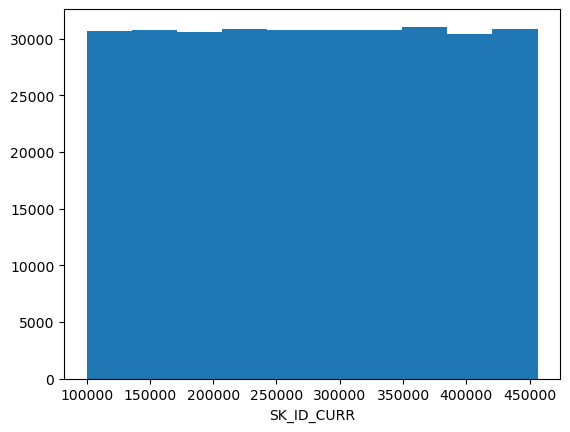

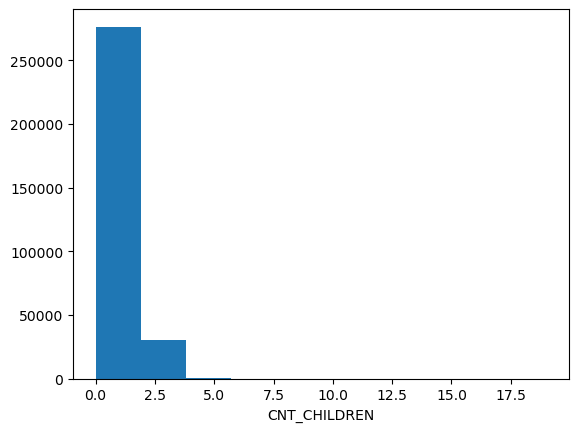

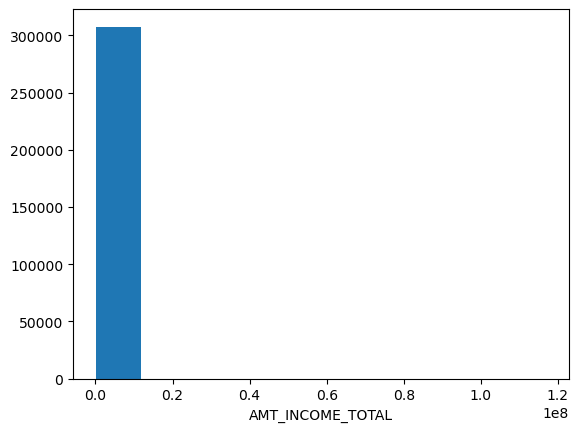

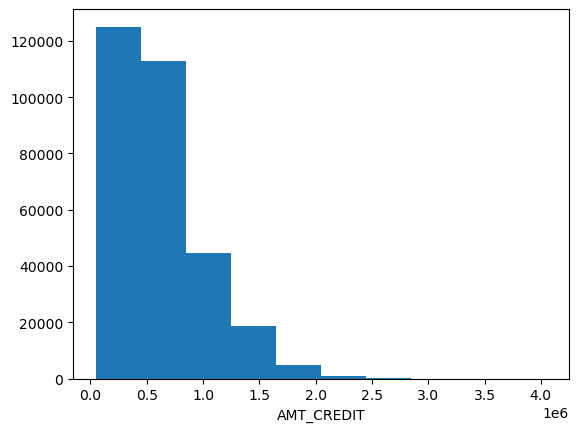

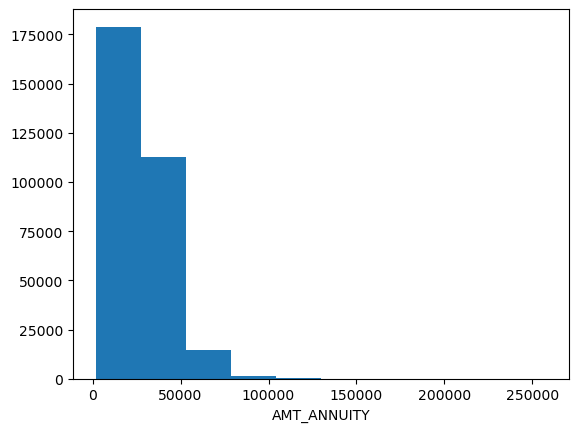

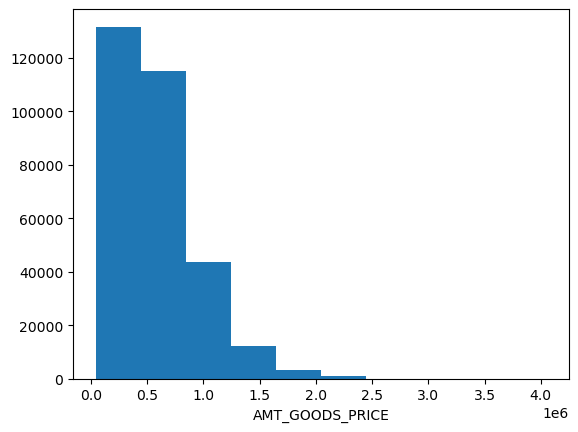

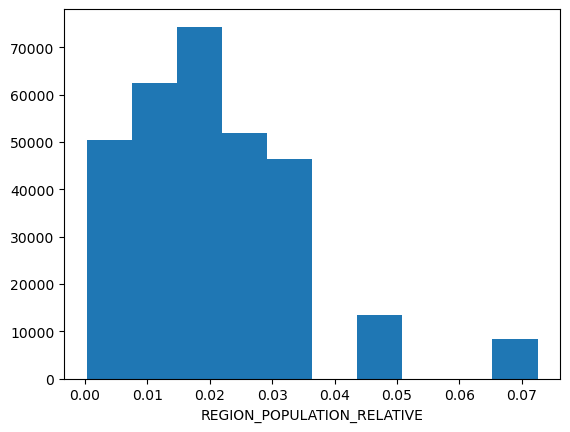

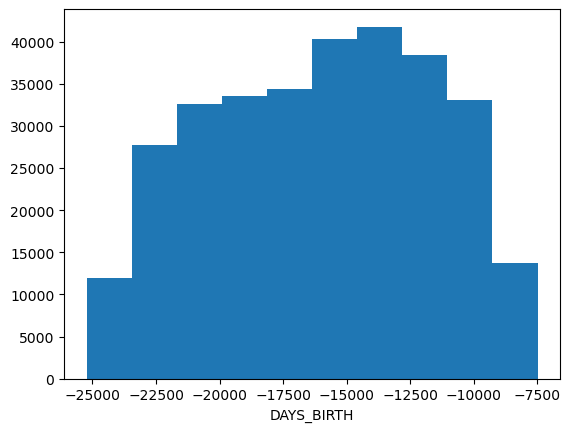

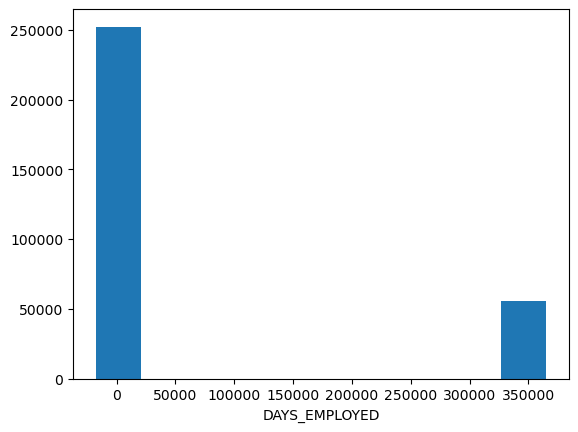

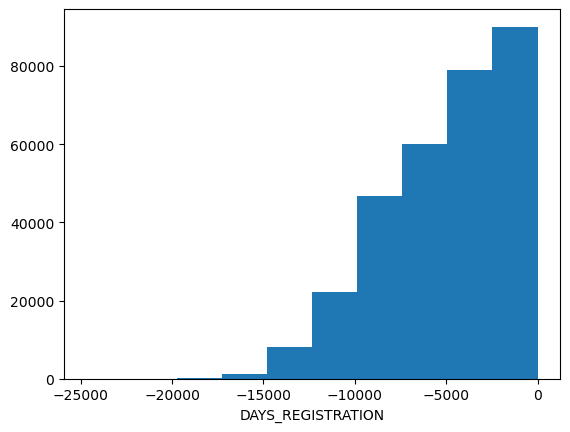

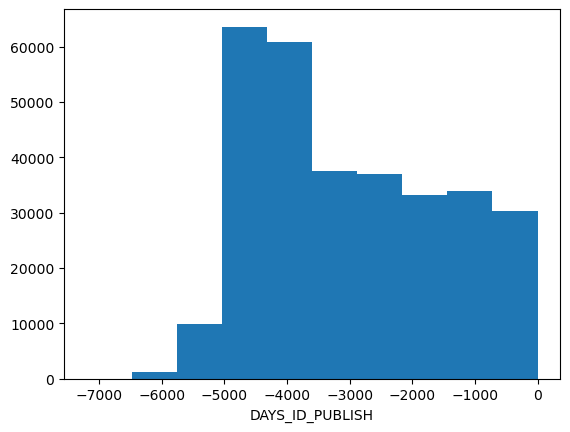

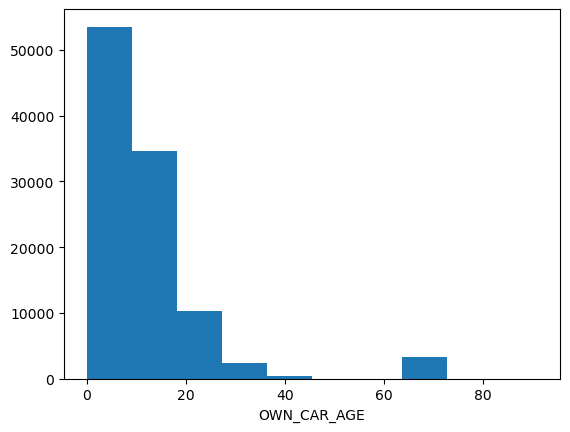

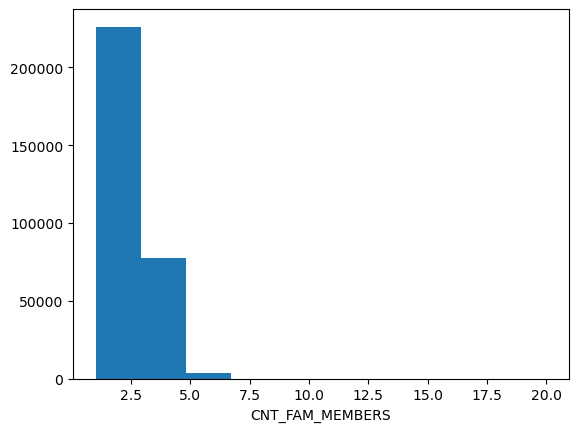

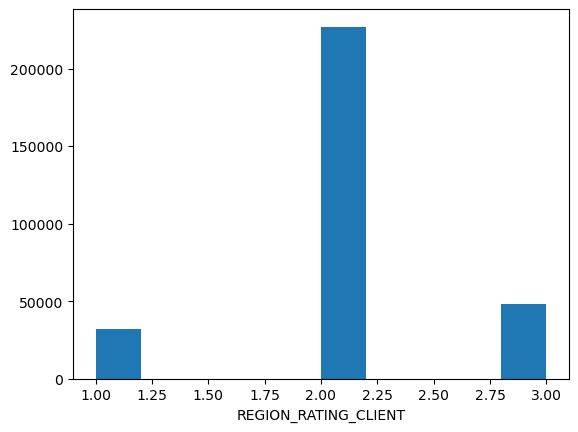

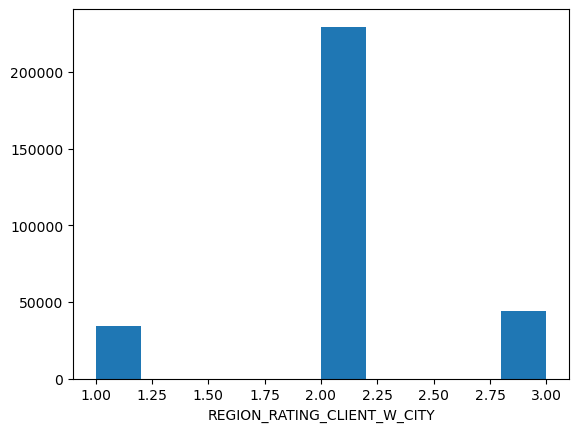

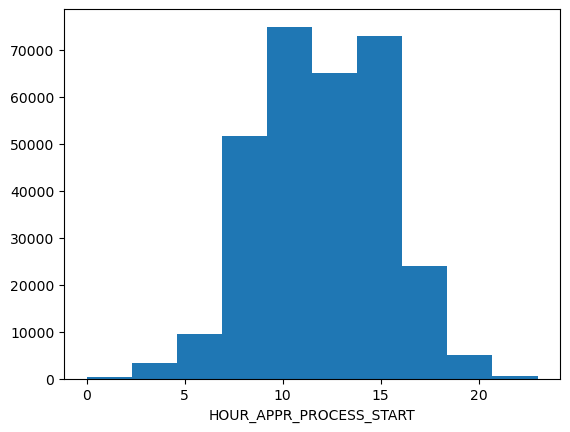

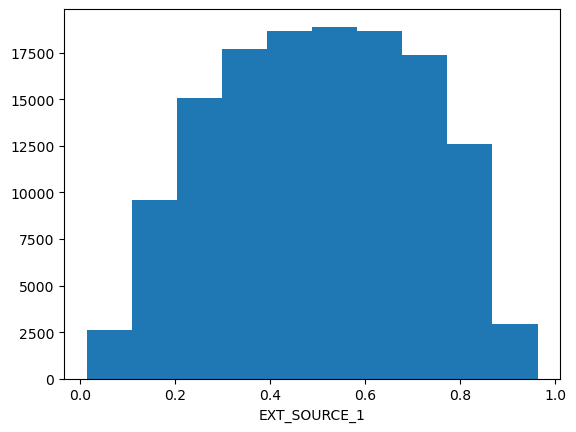

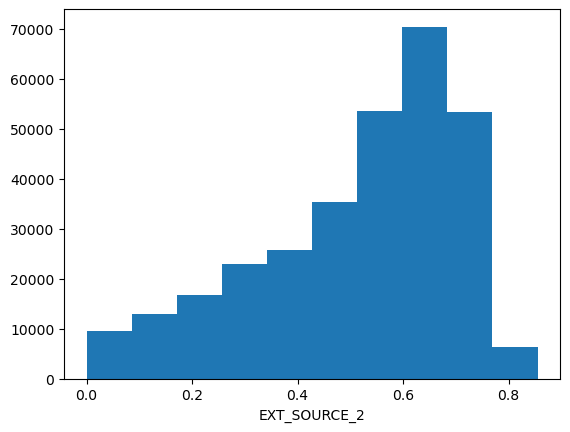

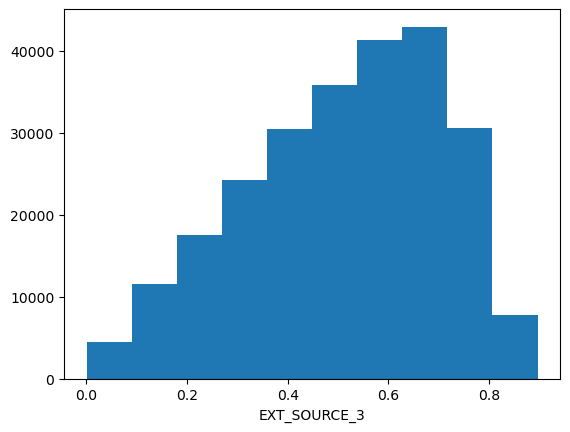

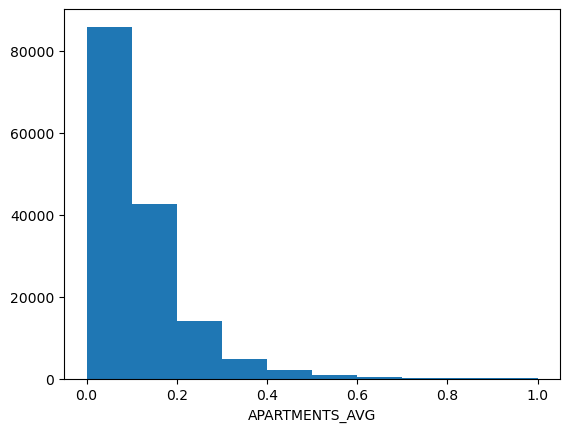

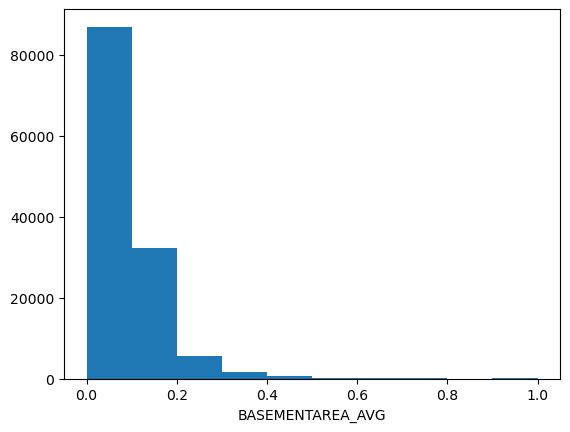

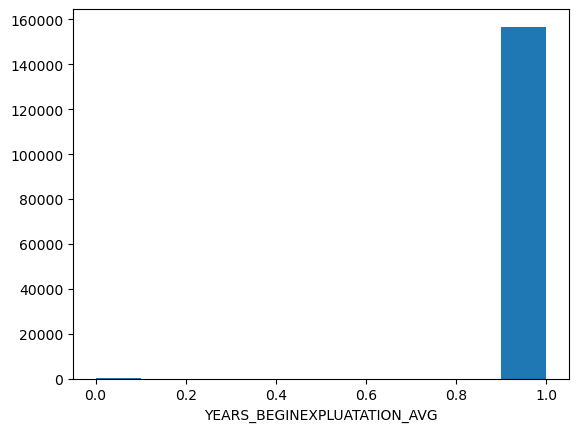

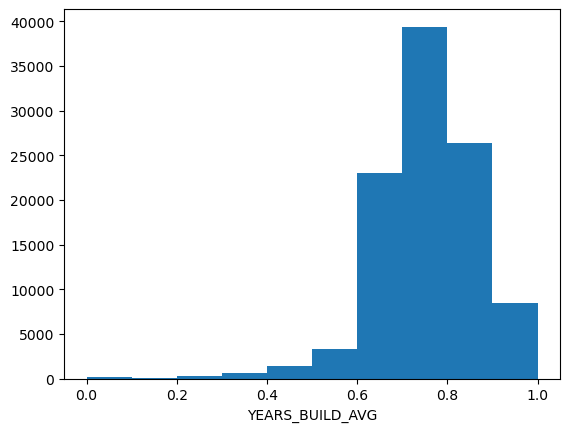

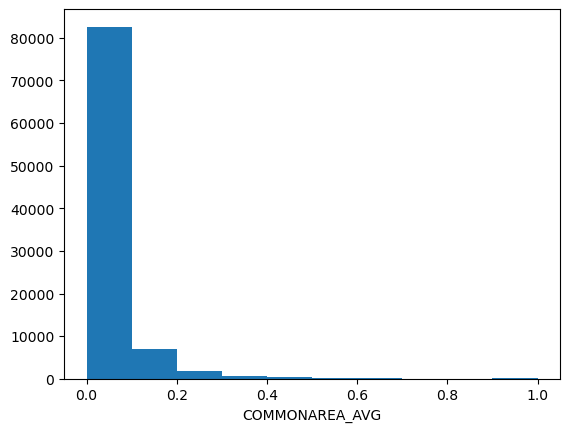

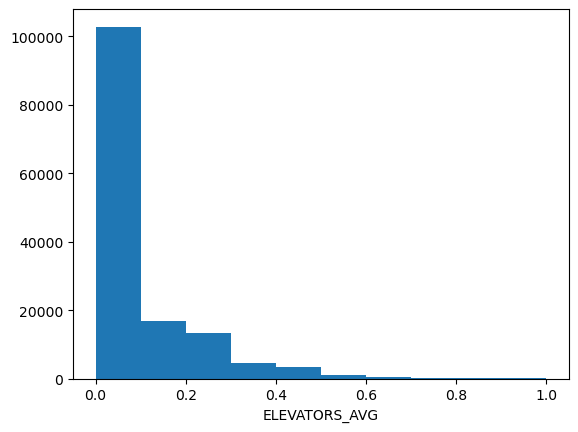

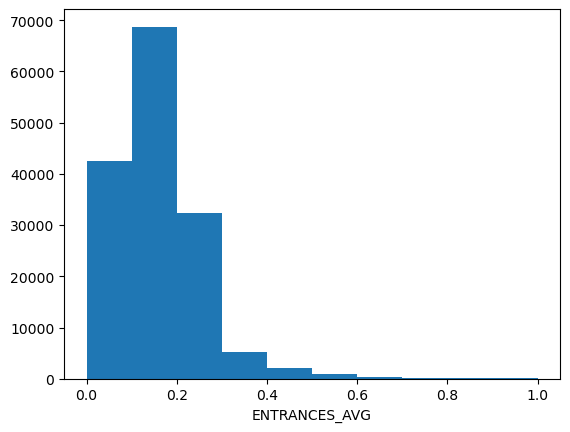

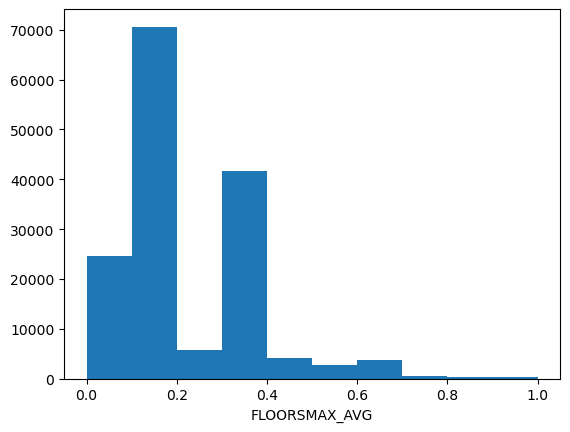

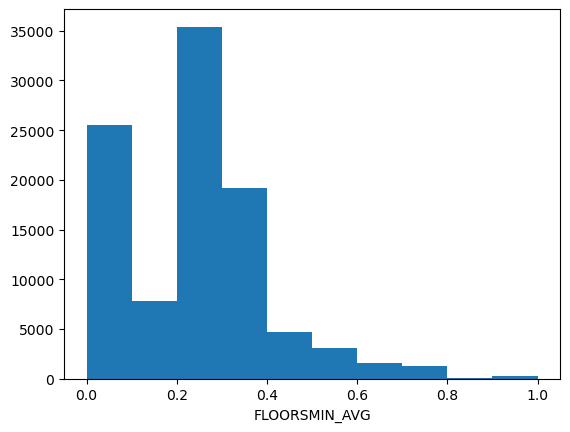

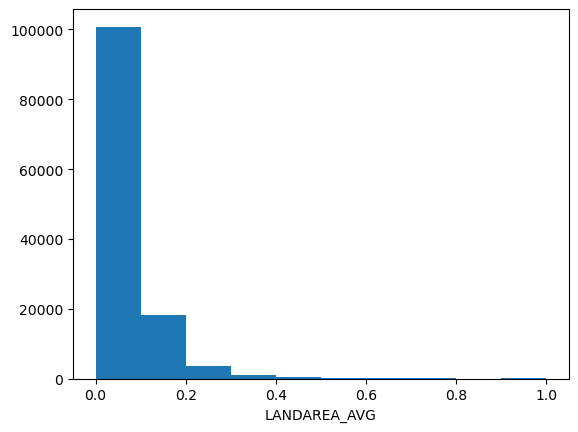

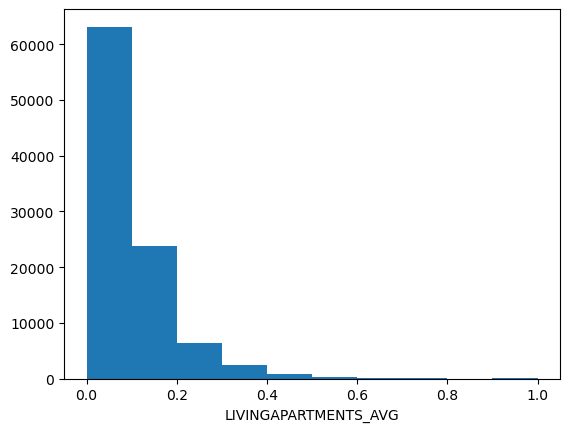

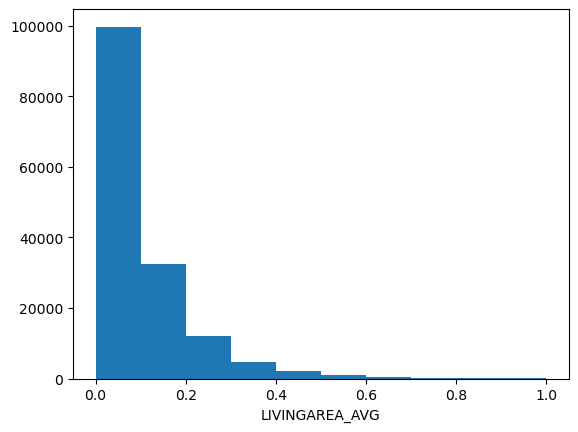

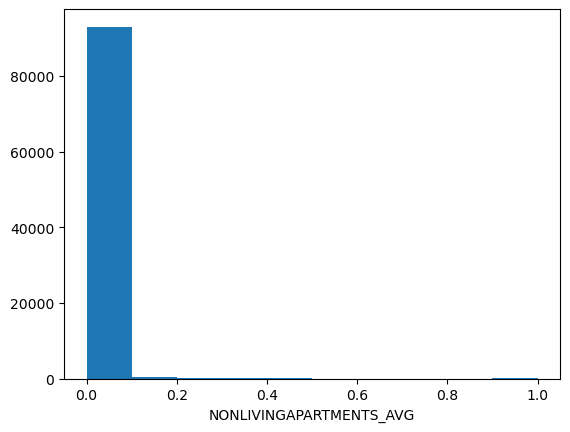

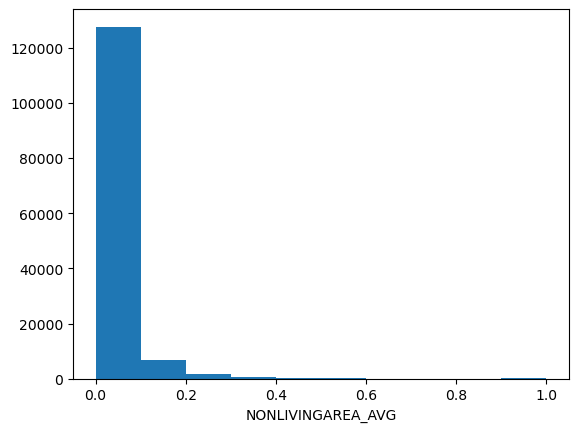

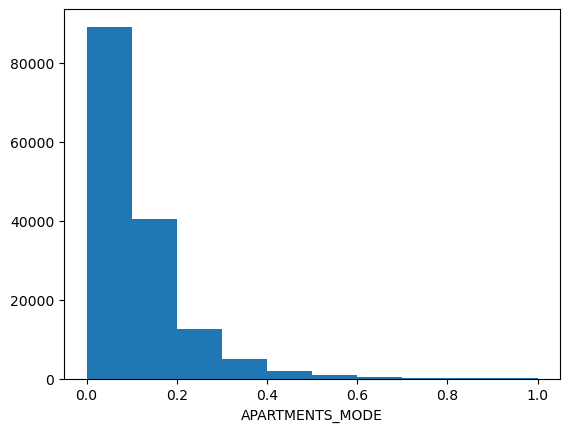

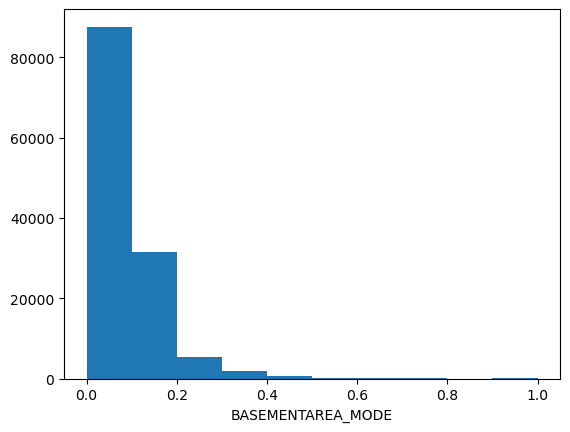

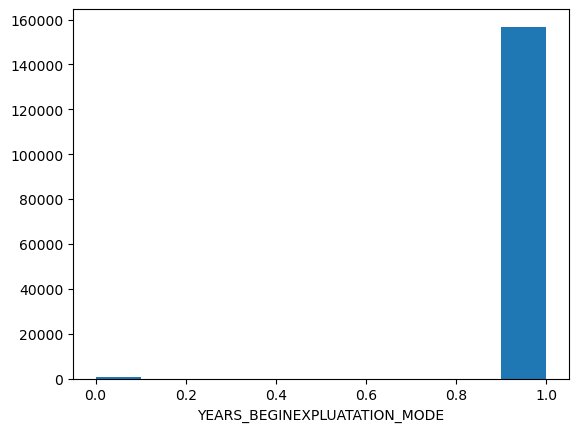

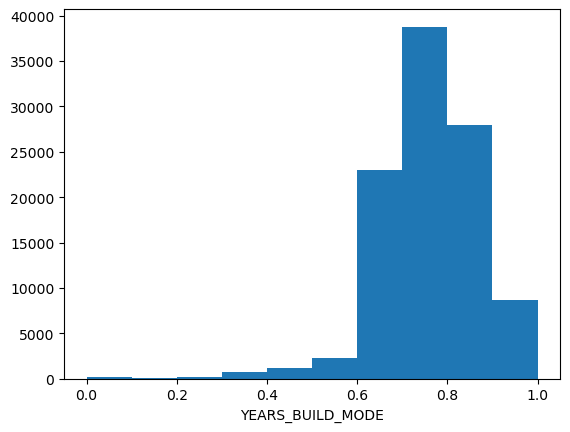

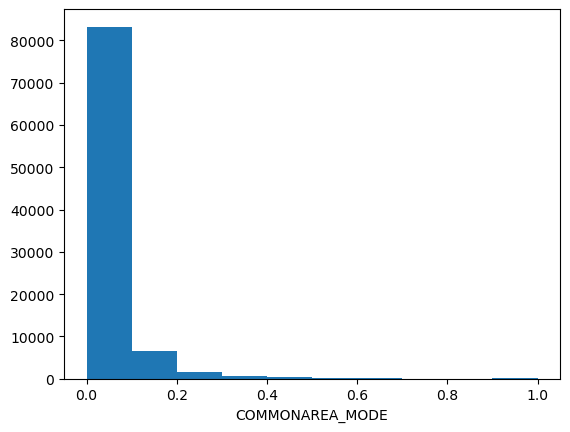

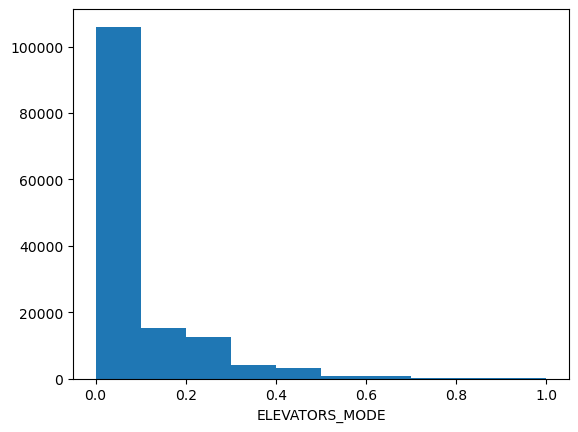

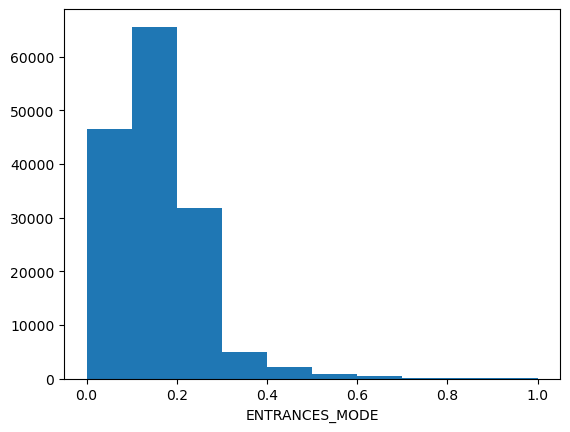

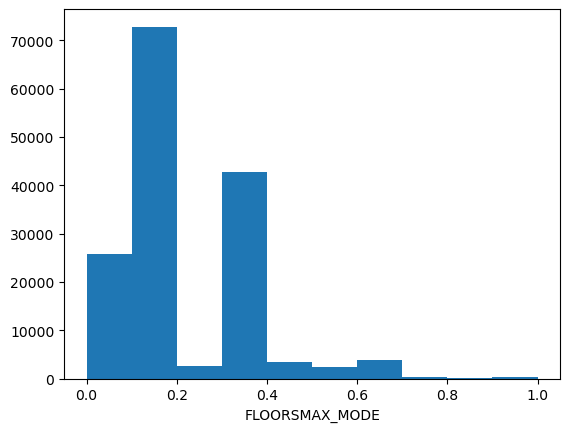

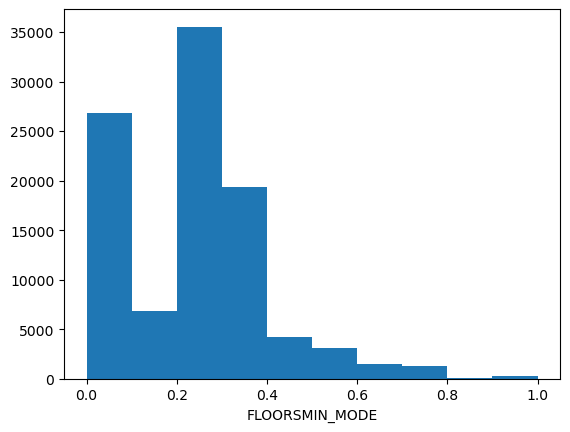

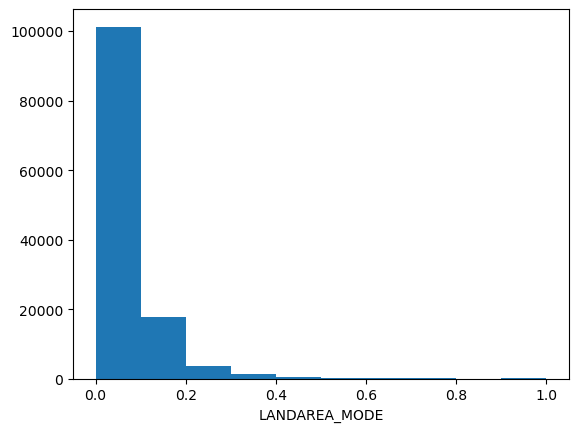

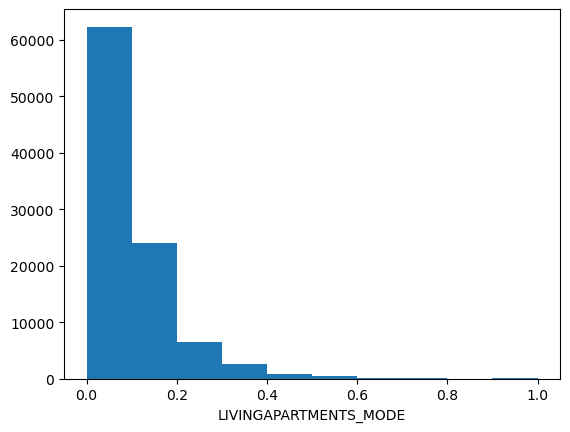

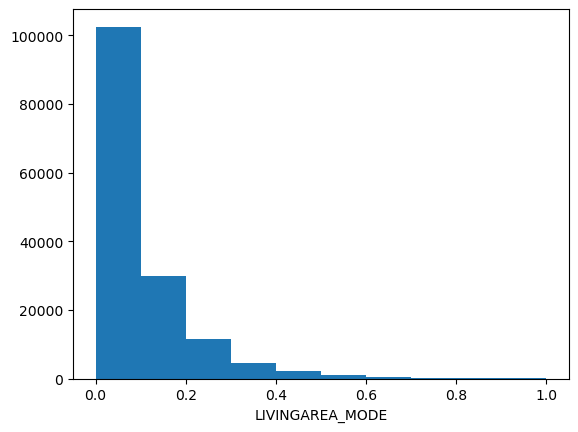

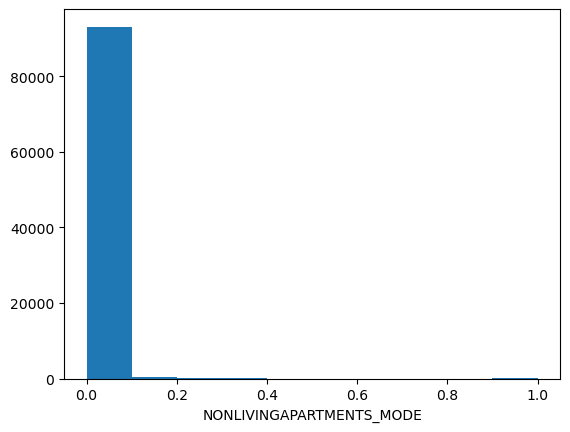

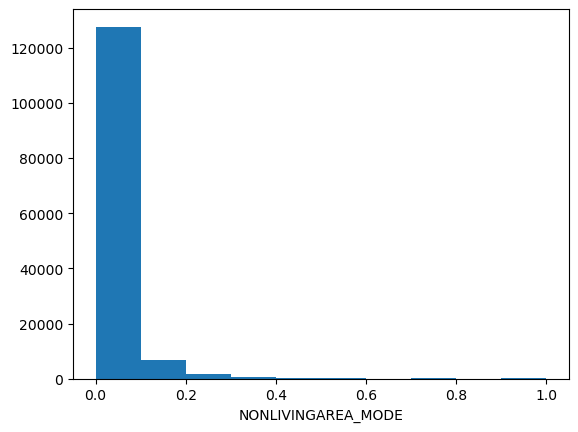

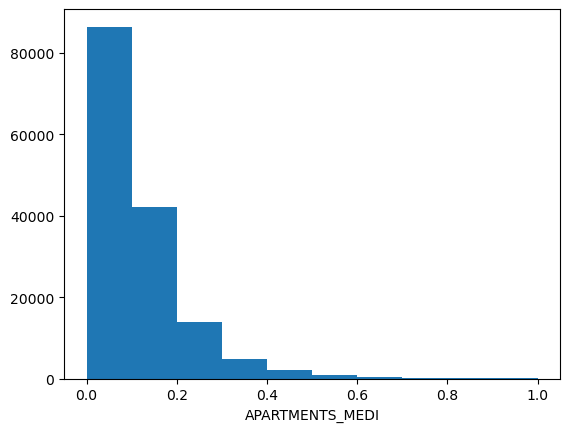

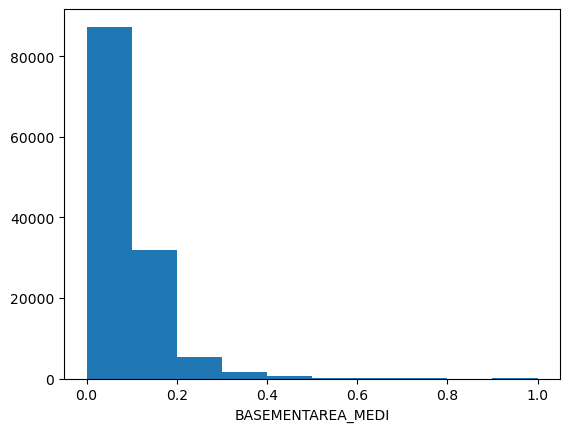

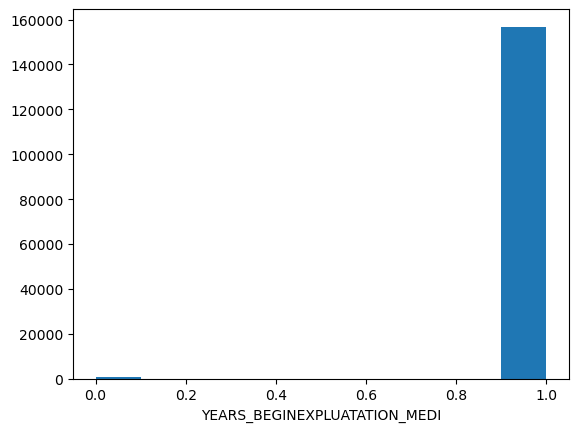

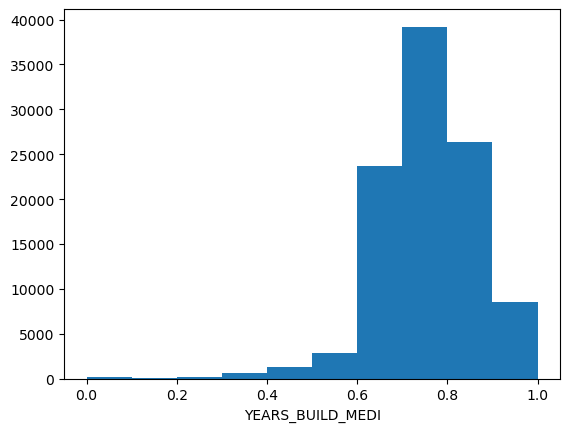

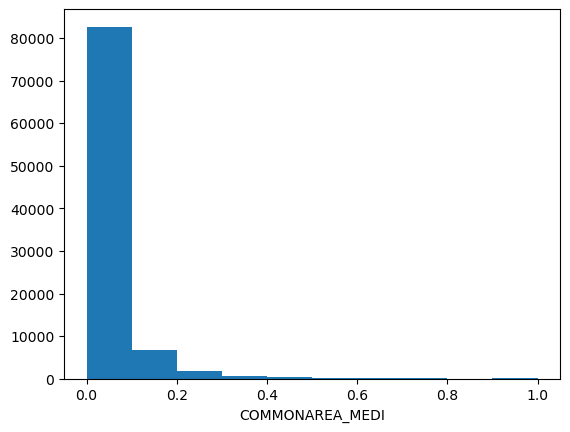

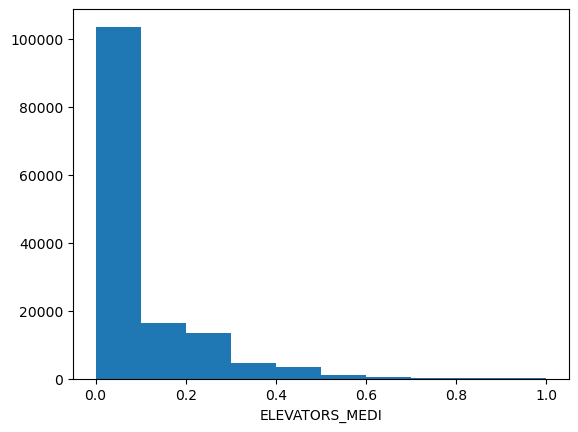

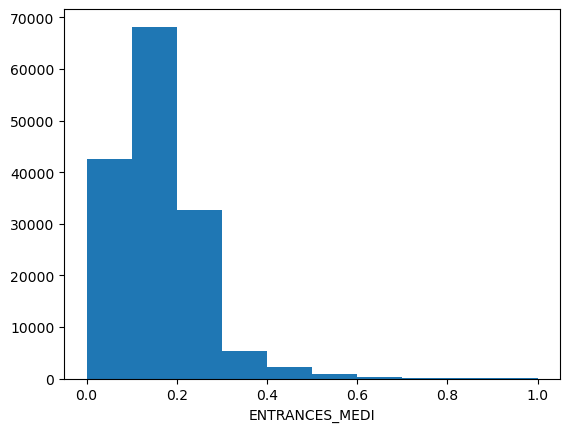

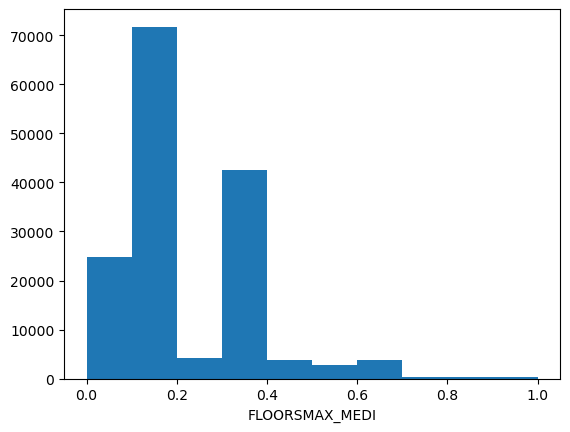

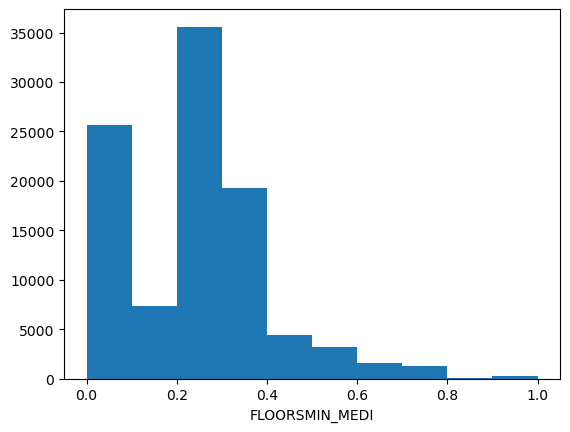

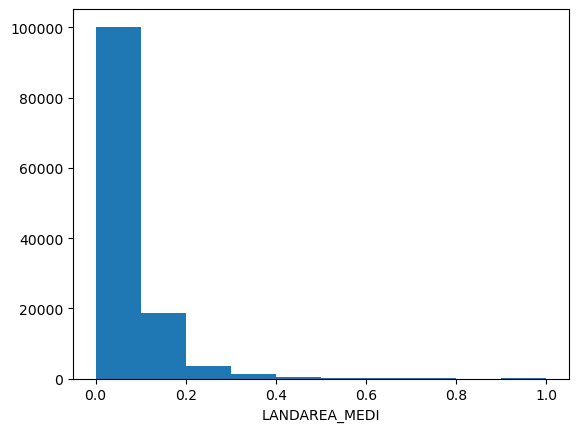

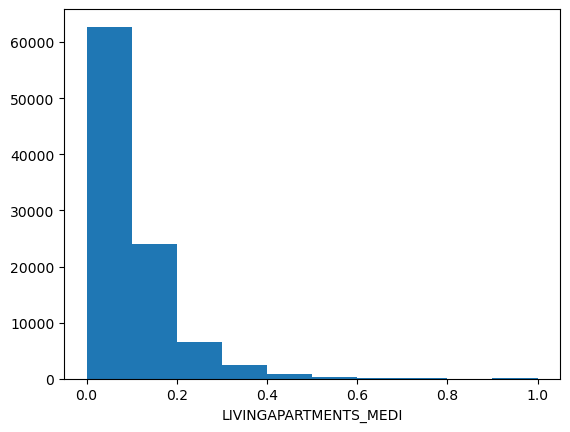

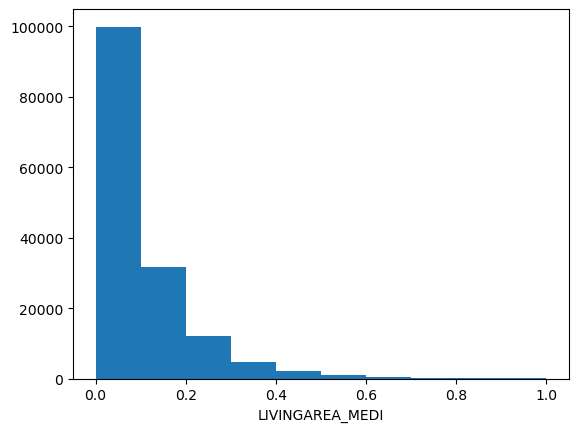

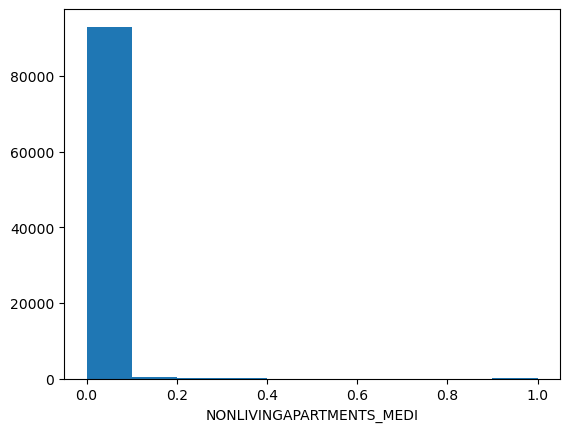

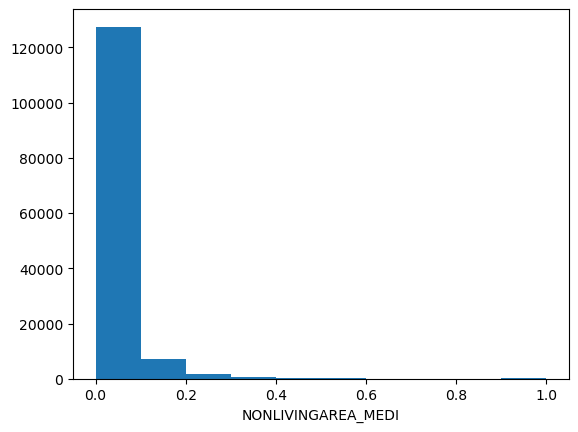

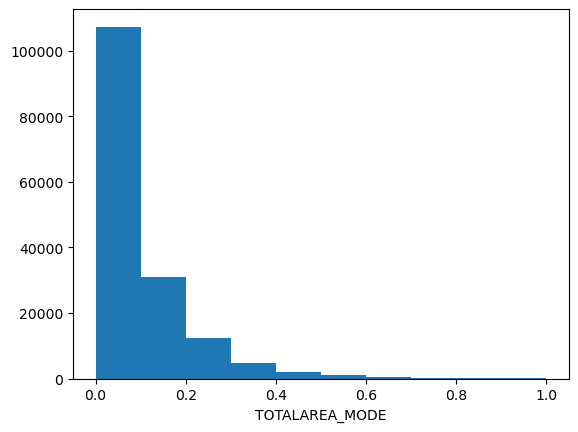

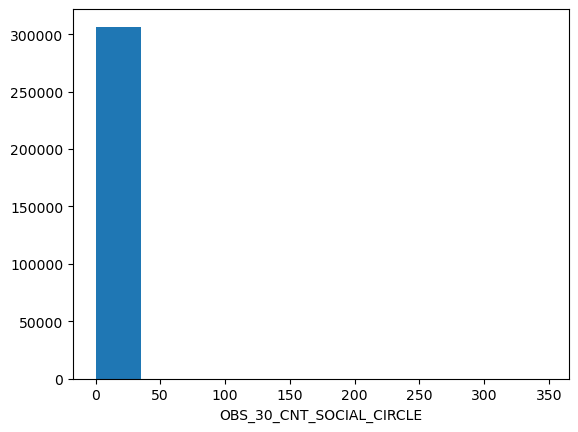

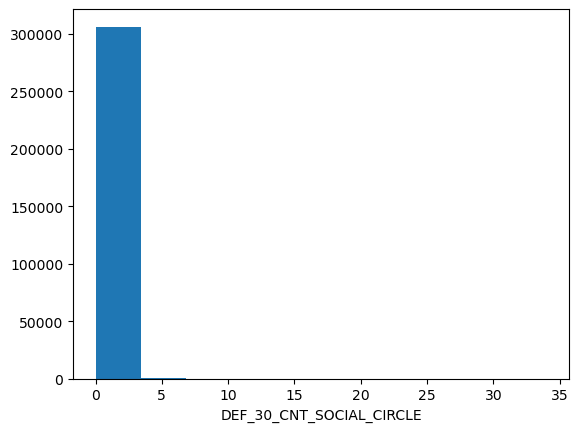

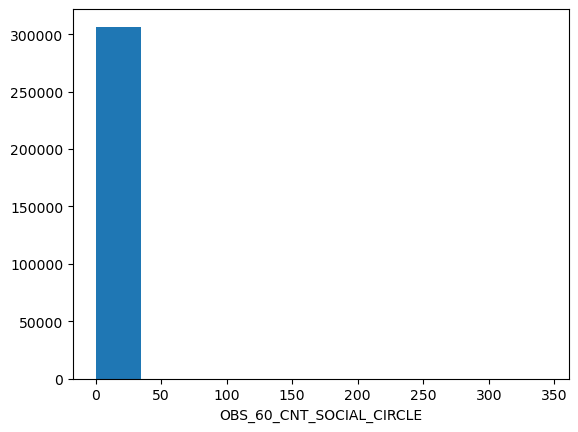

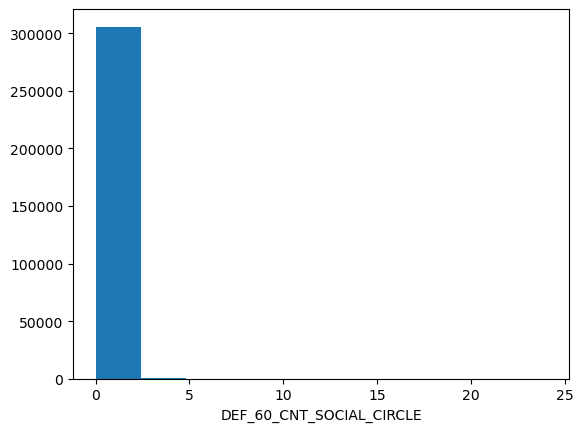

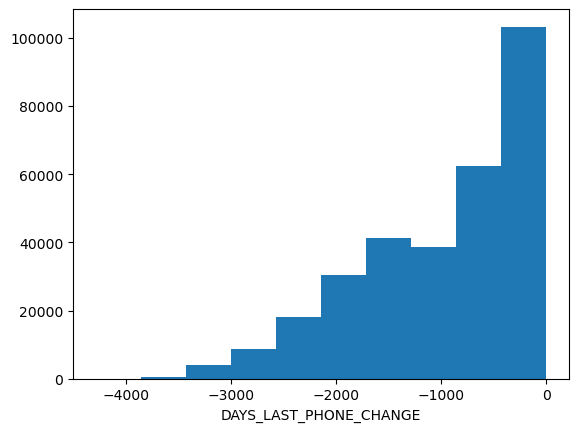

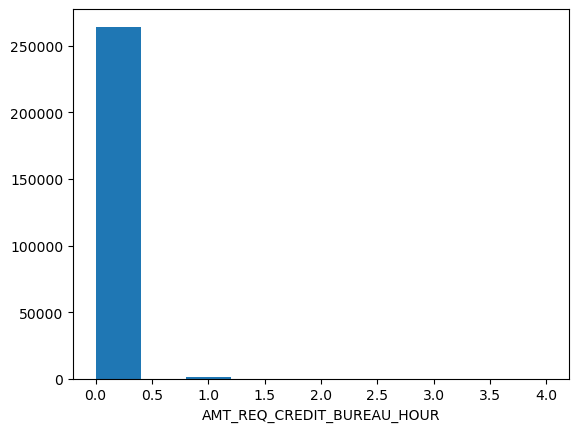

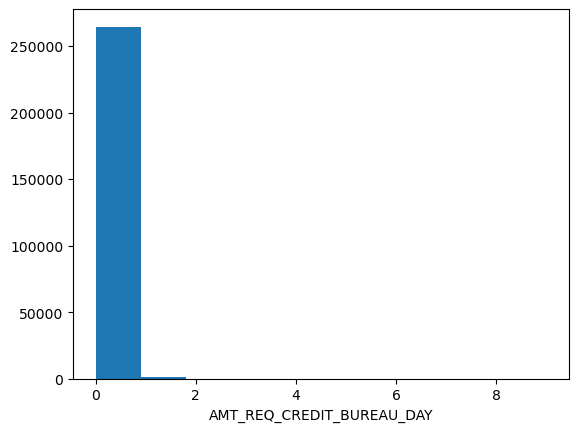

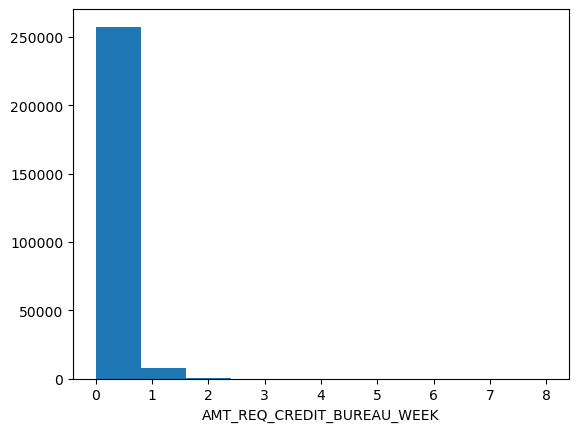

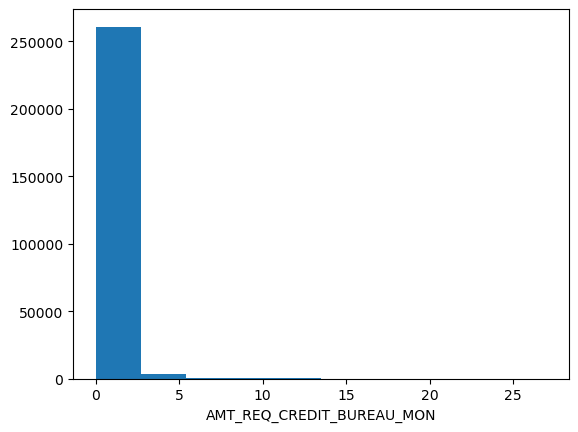

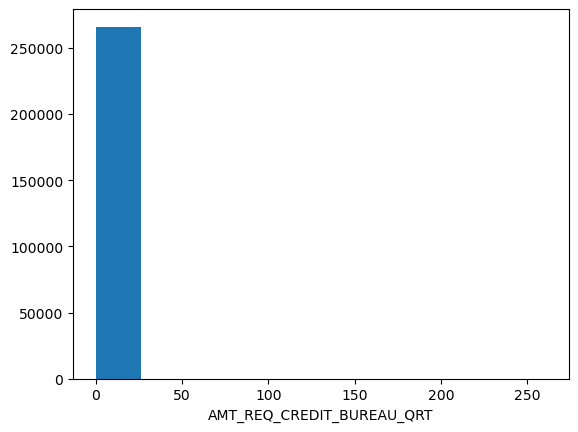

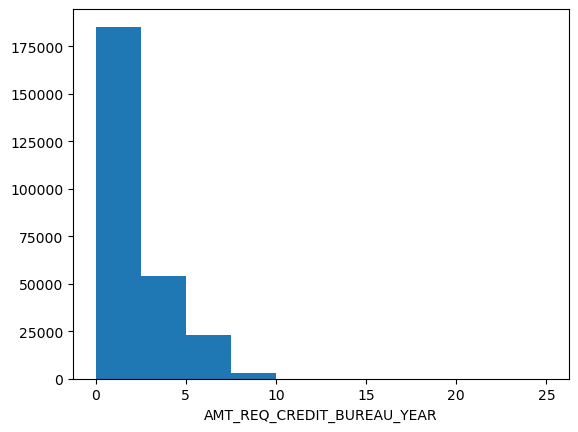

In [50]:
for i in app_train.columns:
    unique_values = app_train[i].unique()
    if i not in cat_var and len(unique_values) > 2:
        plt.hist(app_train[i])
        plt.xlabel(i)
        plt.show()

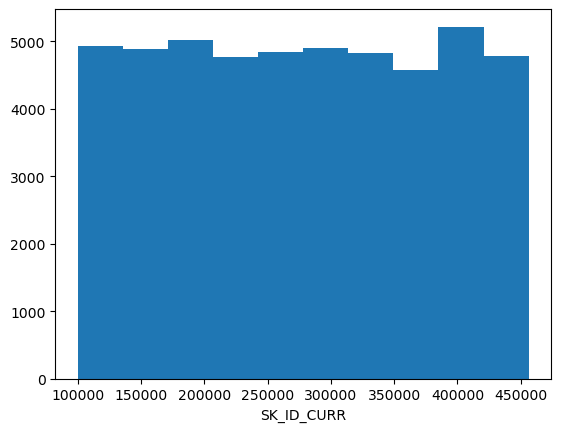

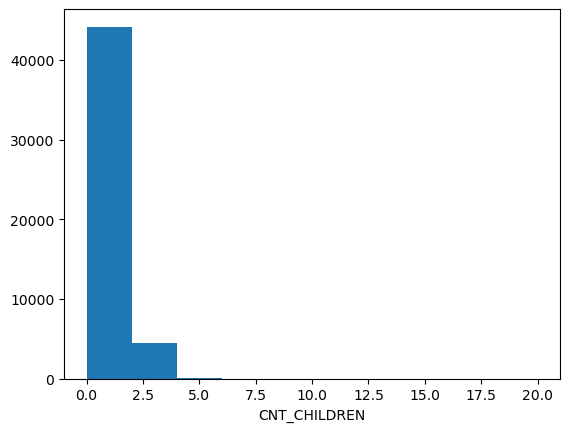

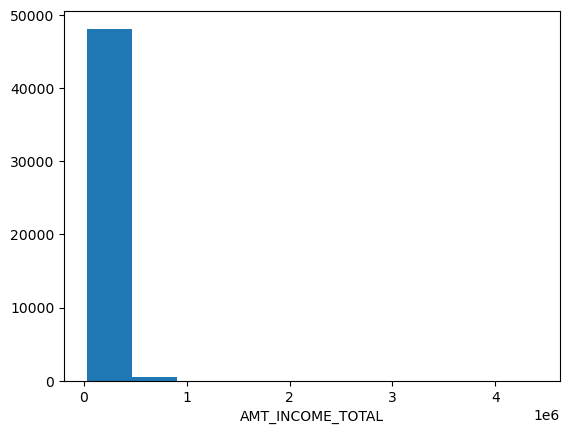

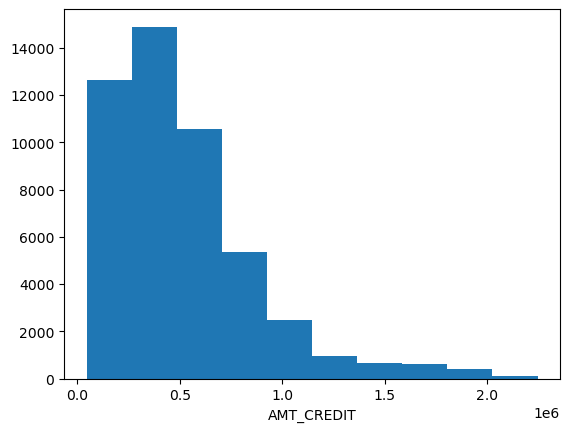

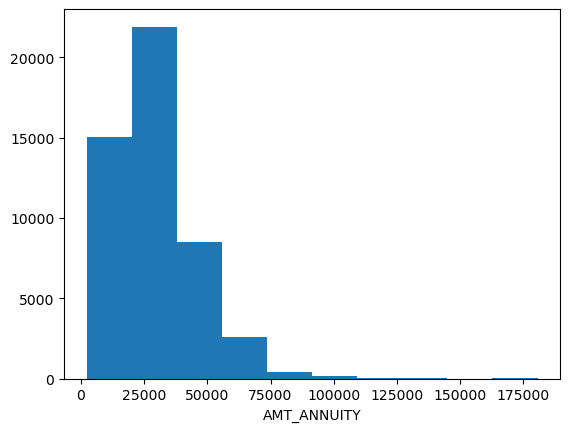

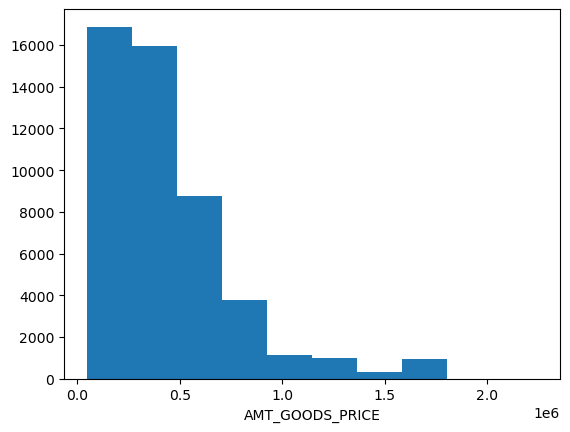

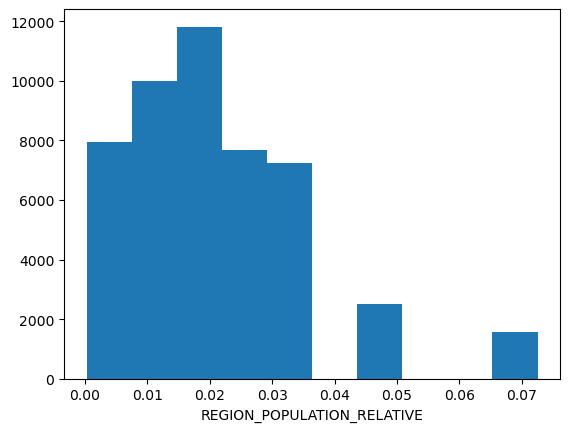

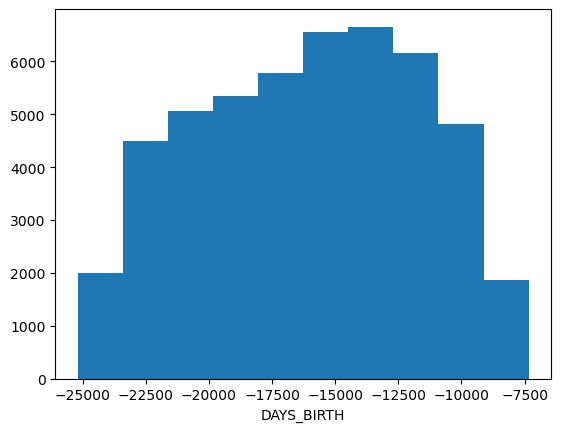

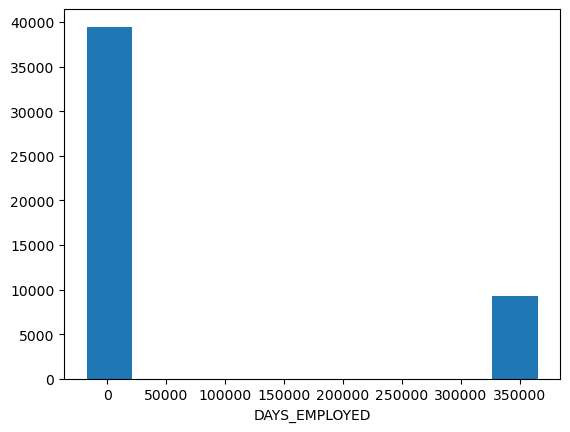

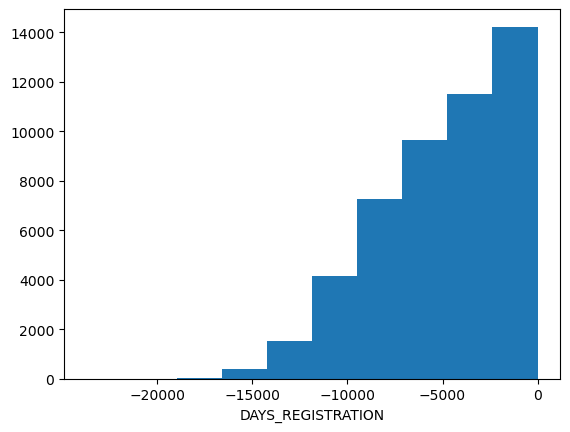

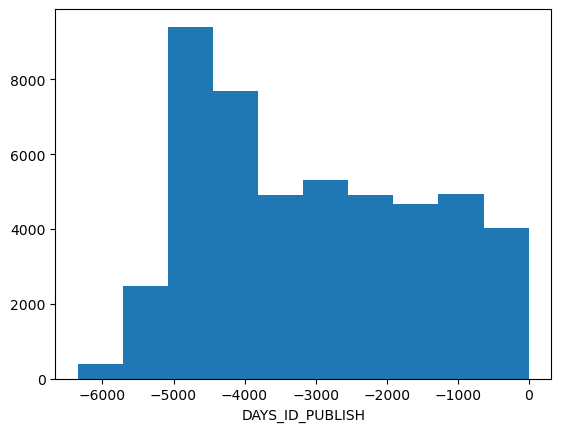

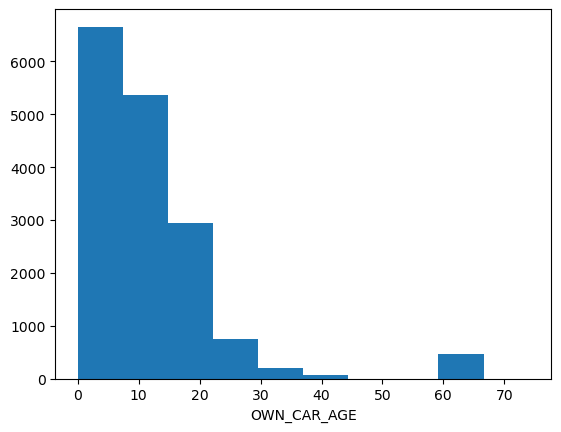

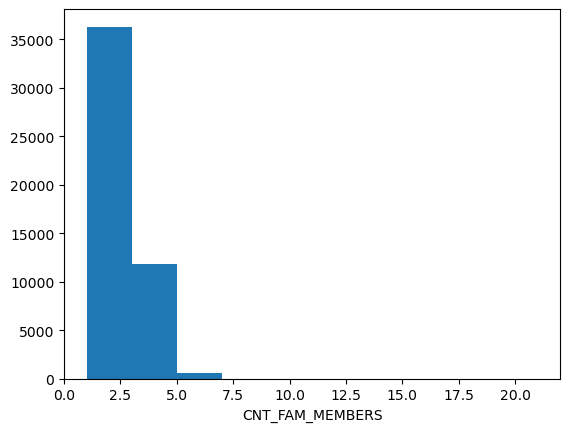

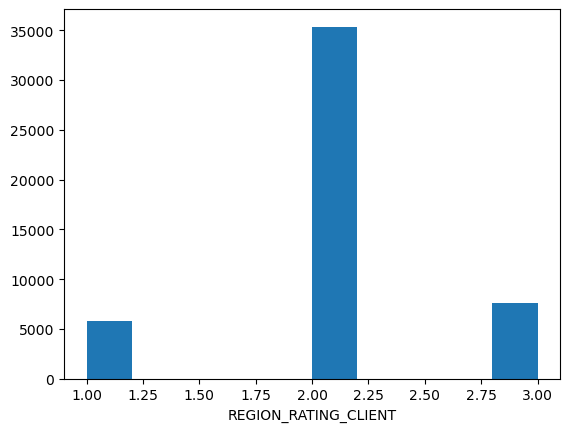

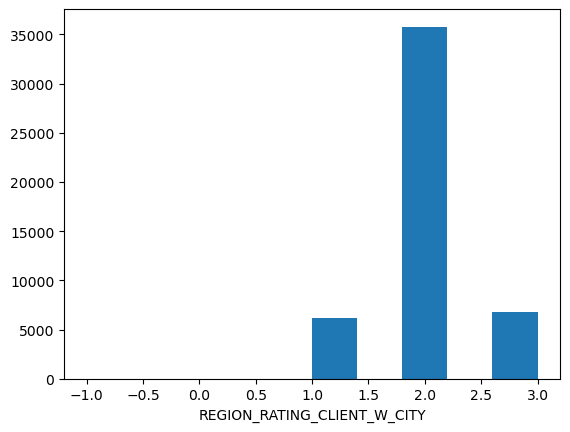

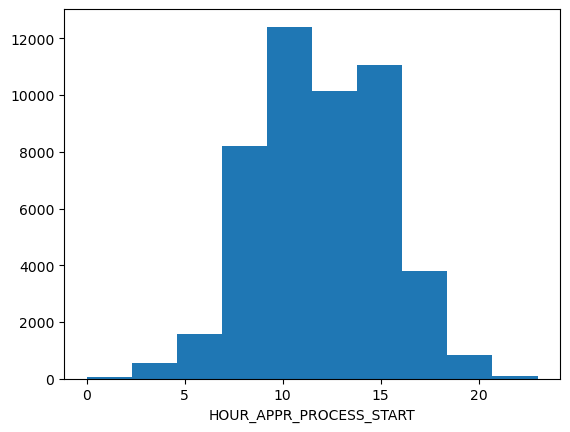

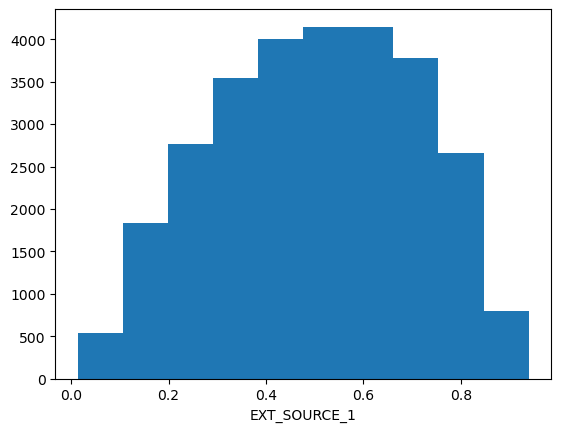

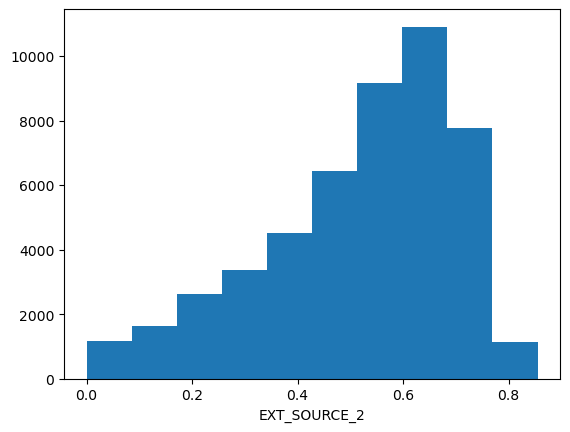

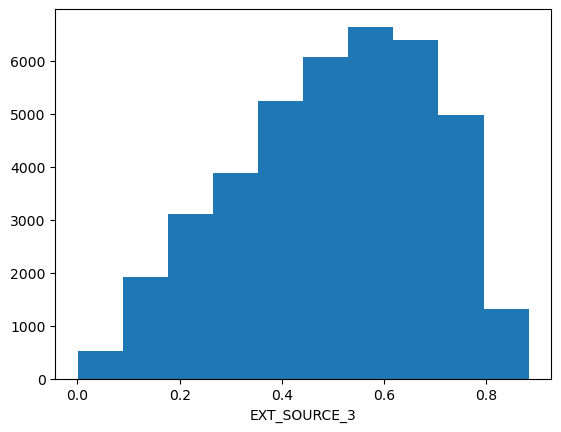

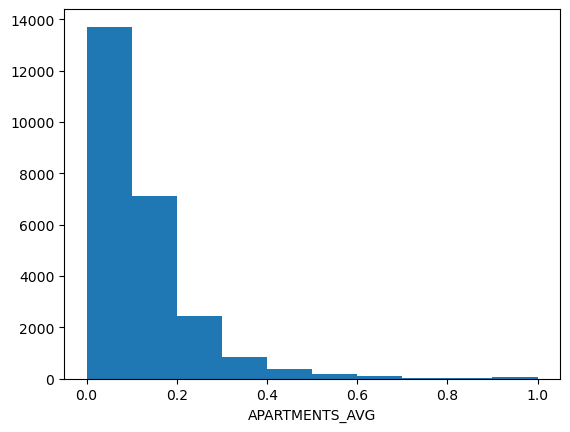

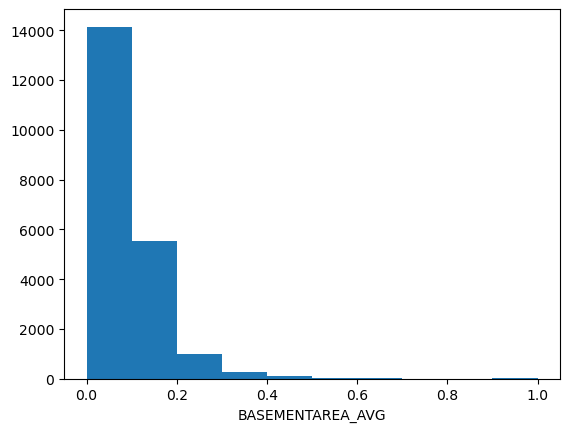

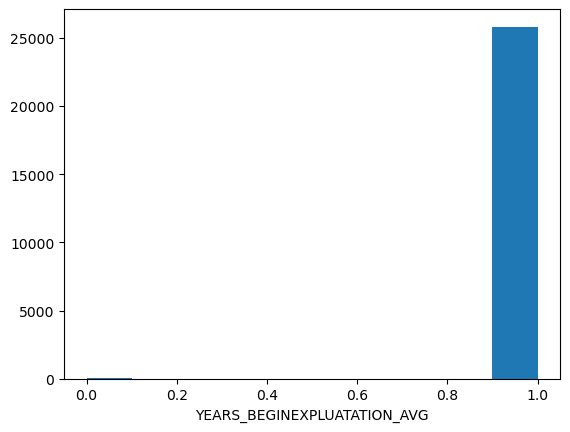

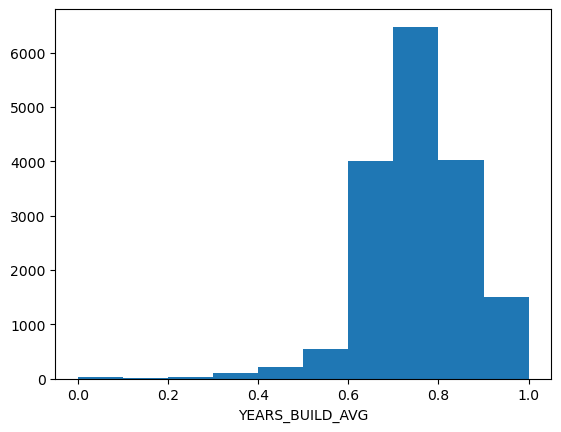

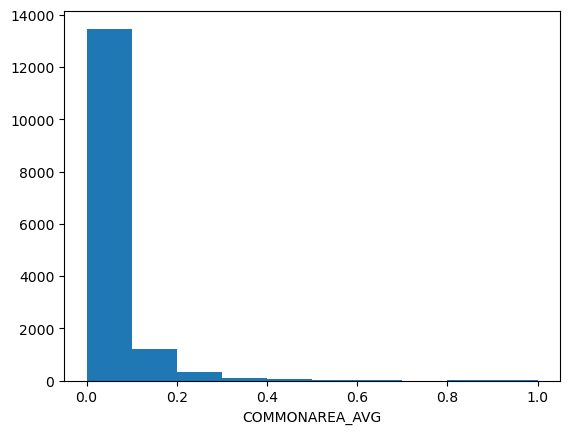

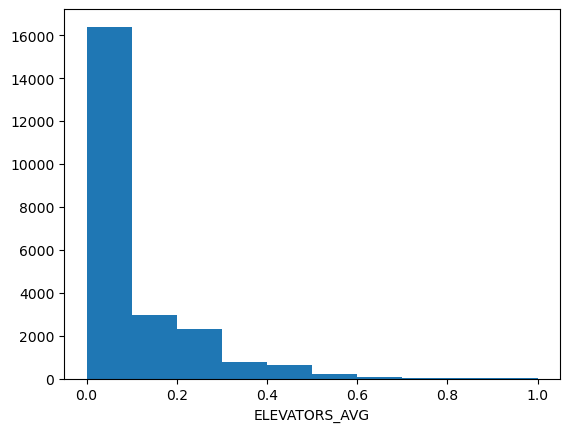

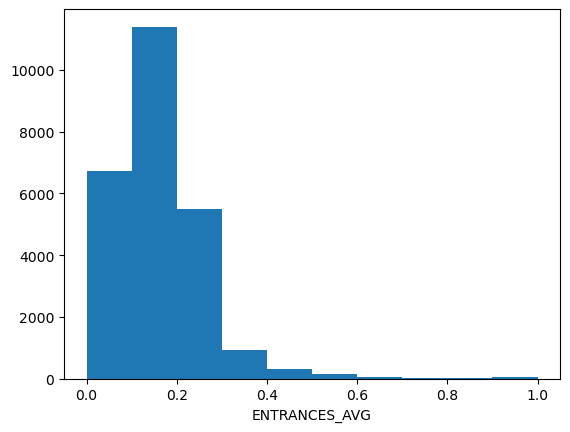

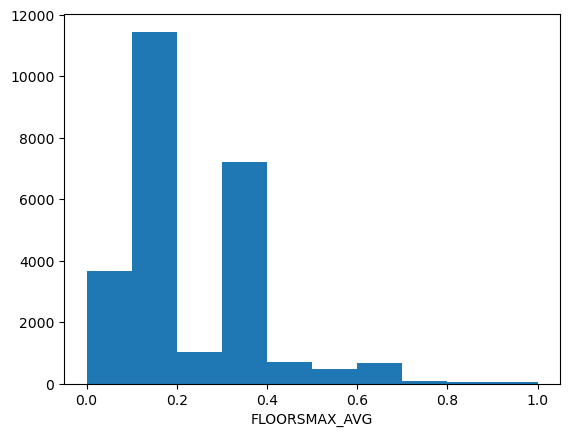

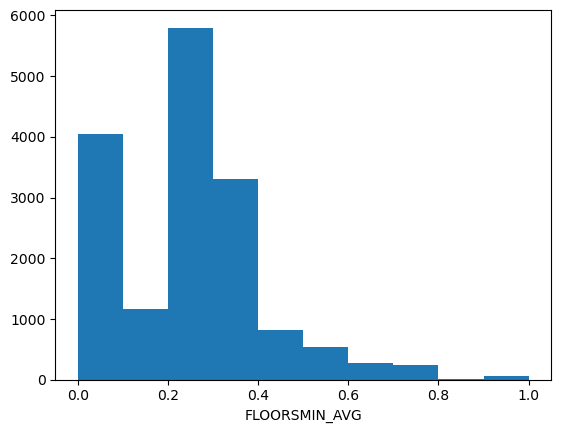

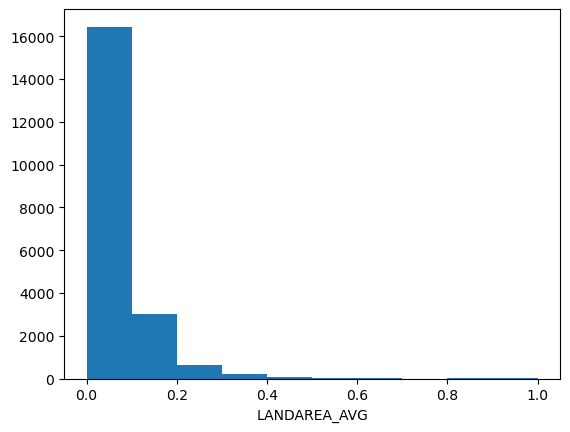

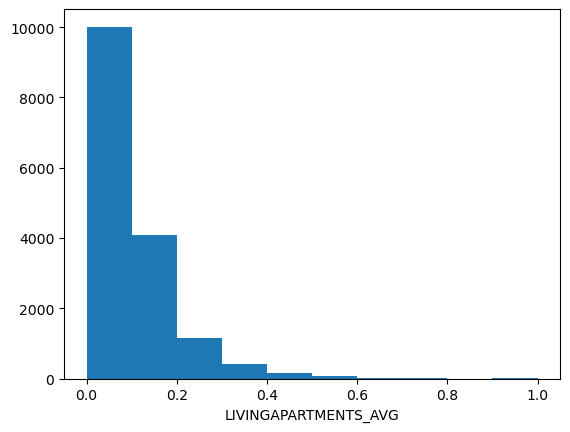

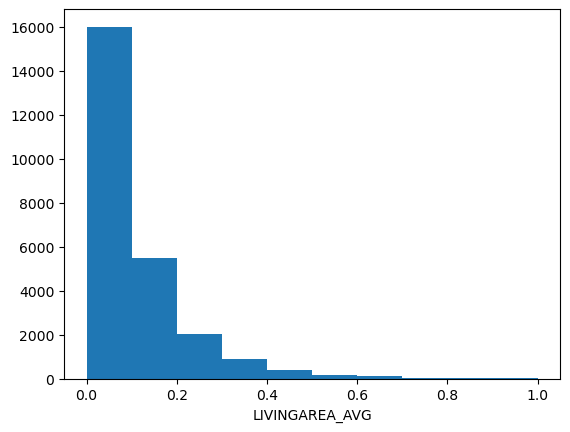

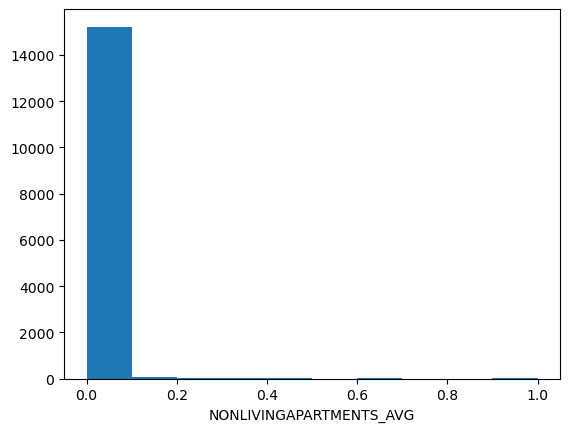

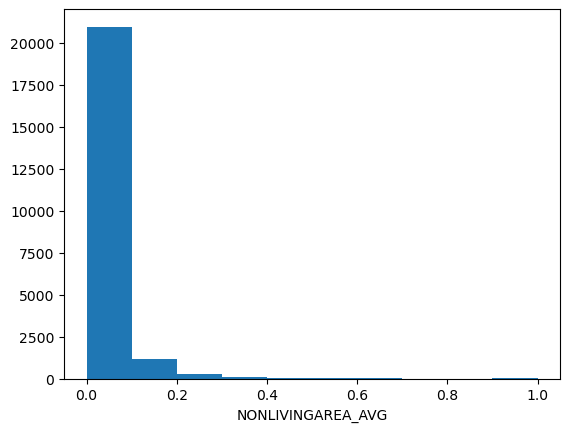

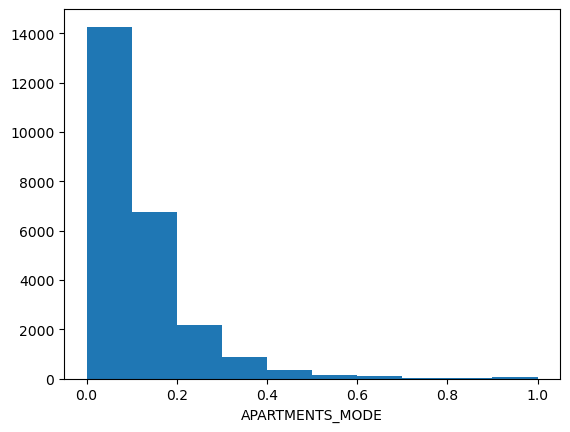

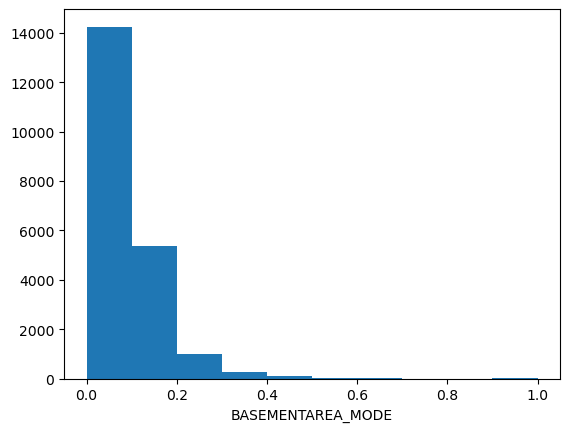

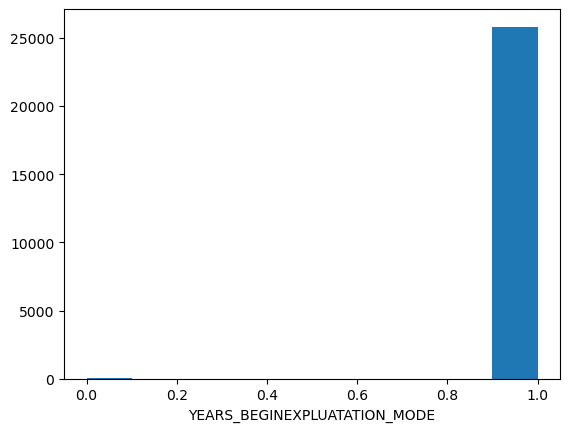

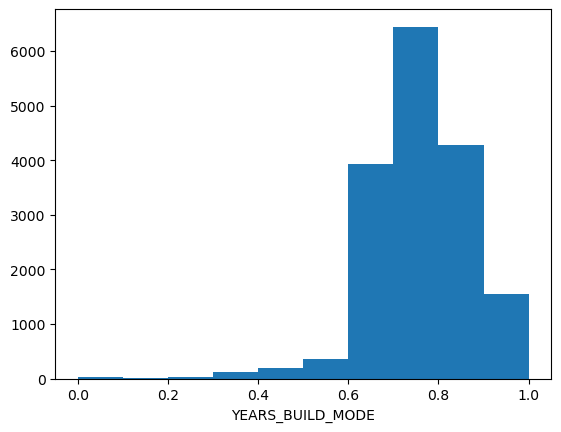

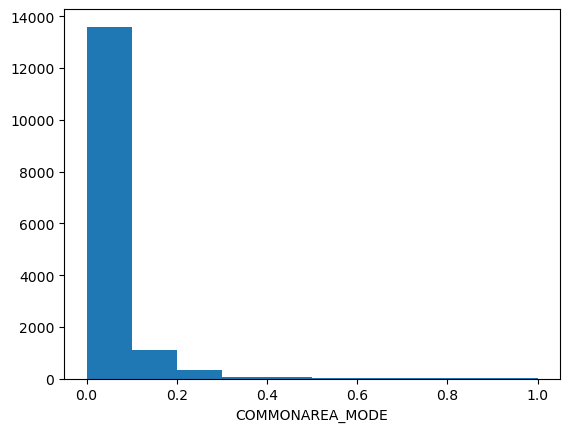

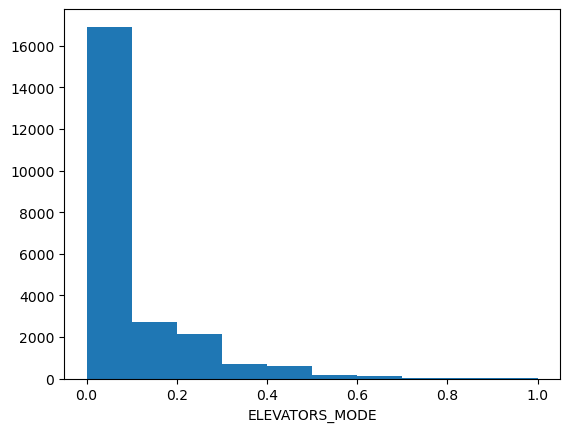

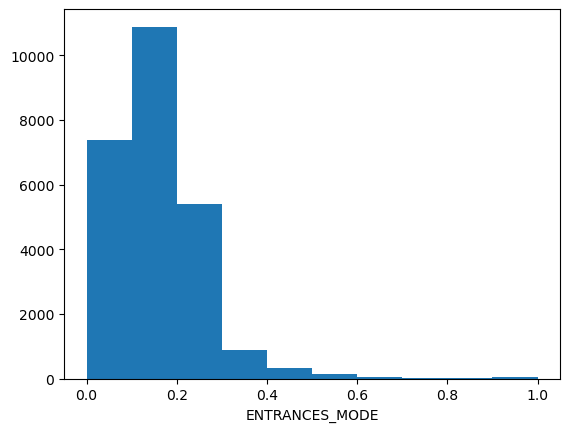

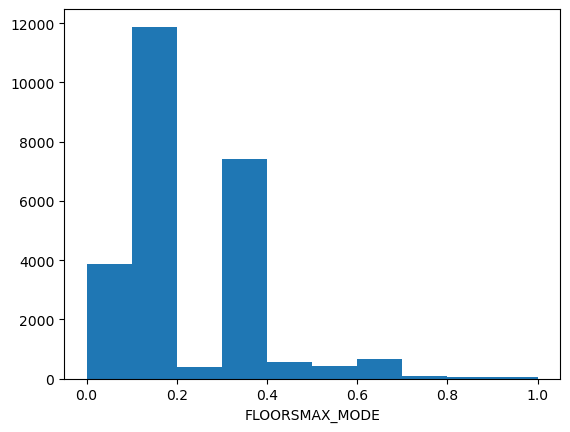

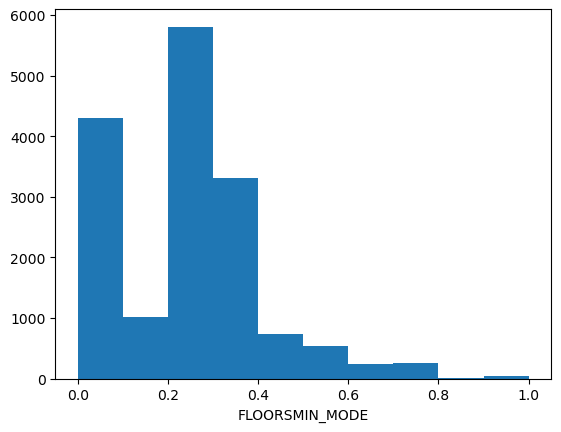

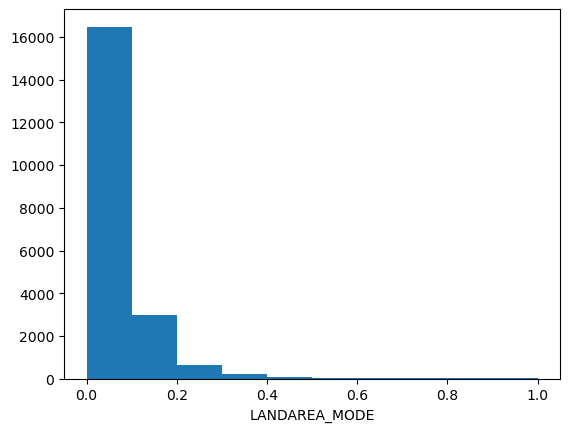

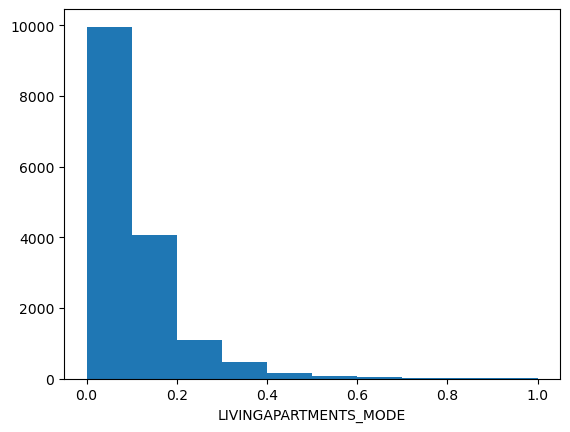

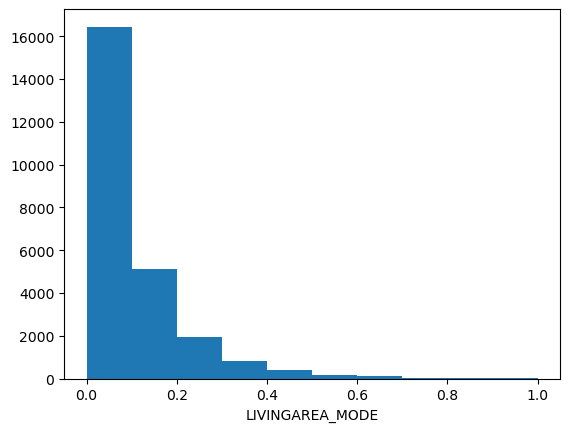

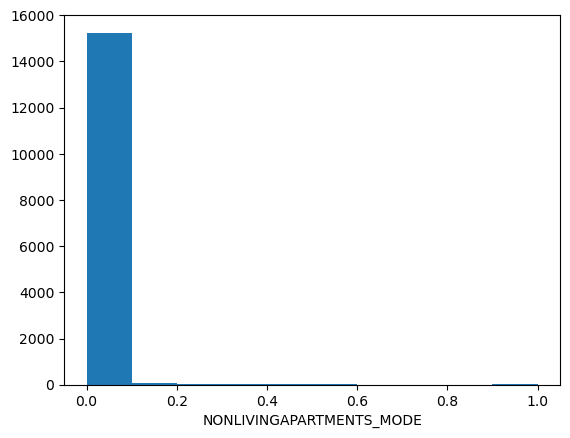

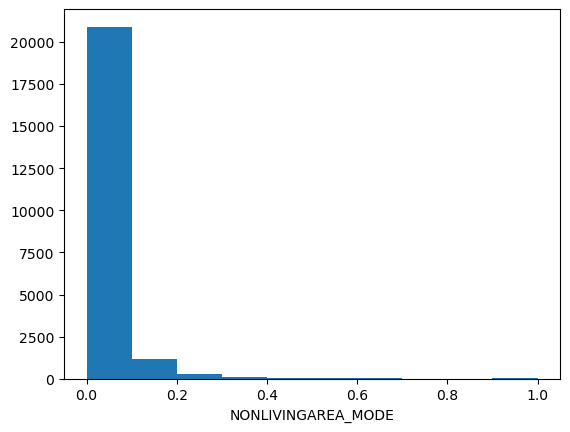

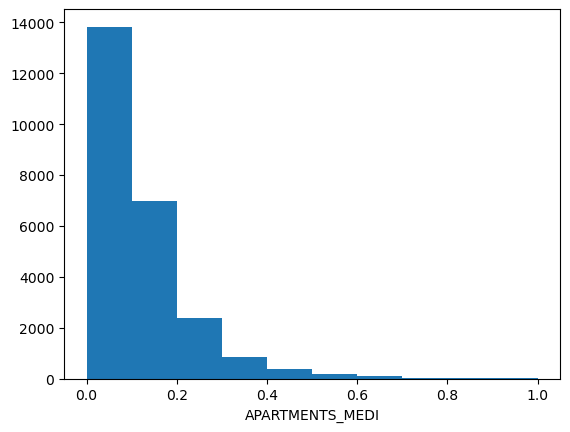

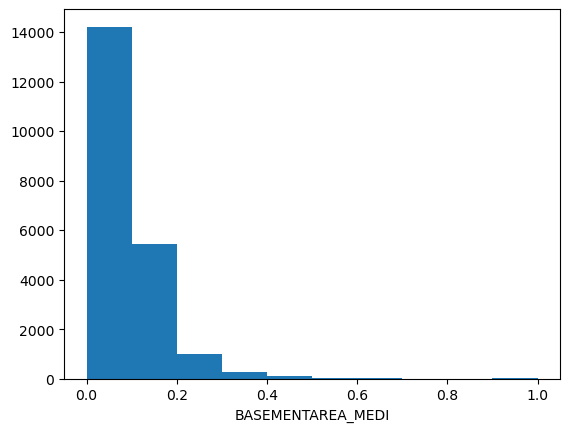

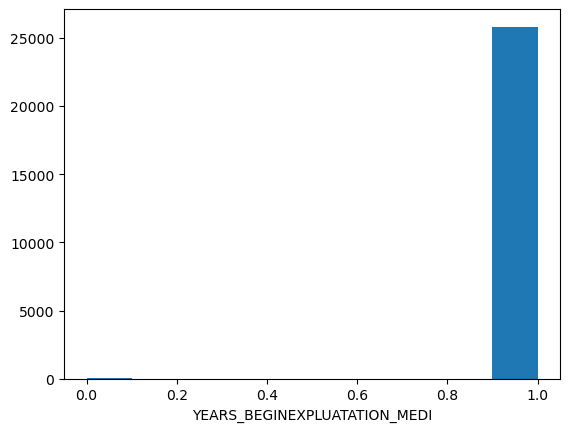

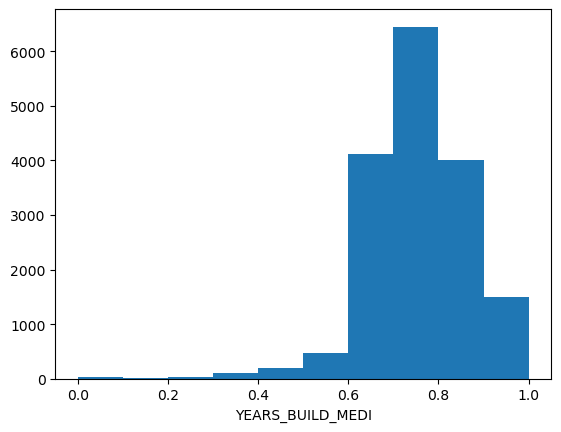

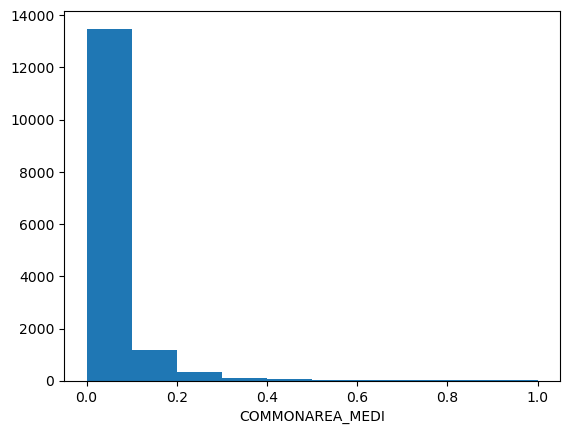

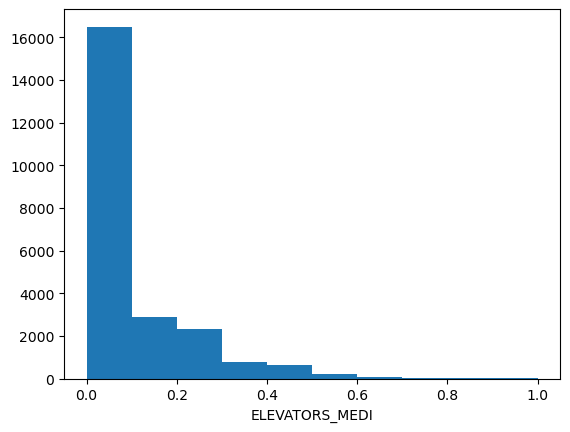

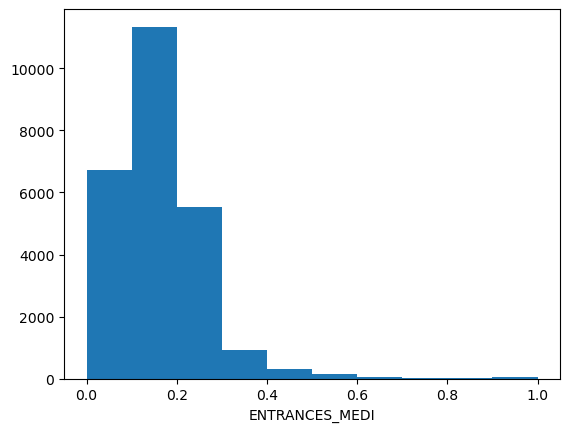

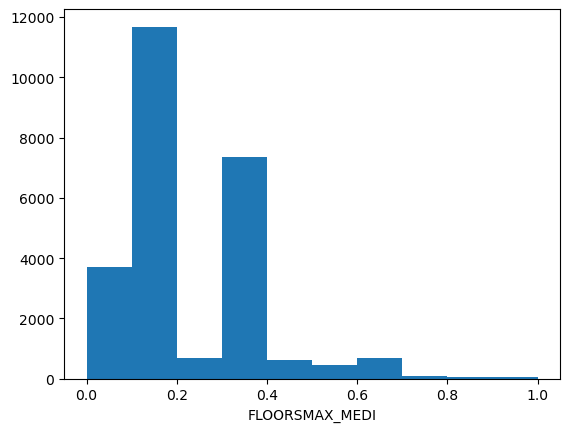

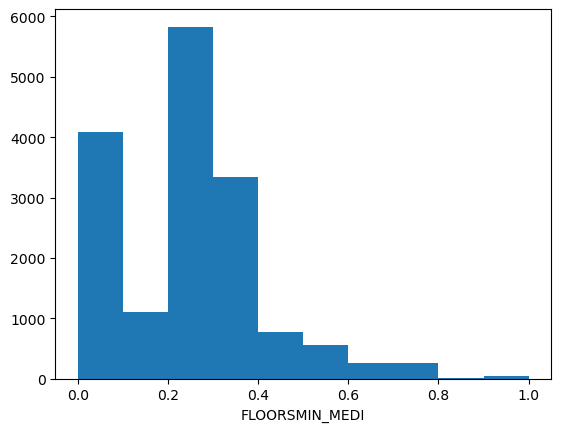

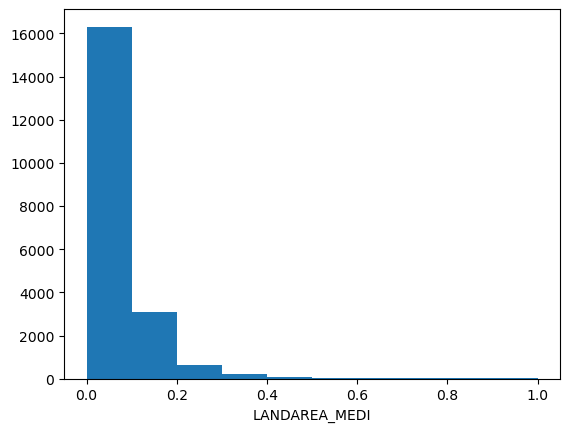

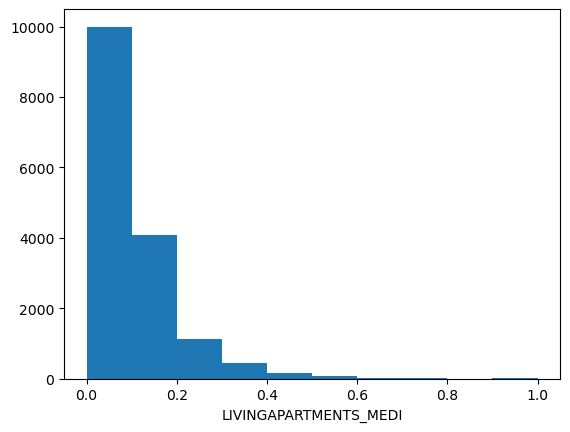

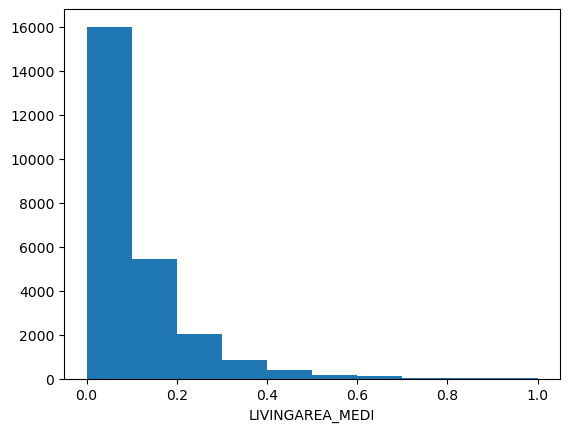

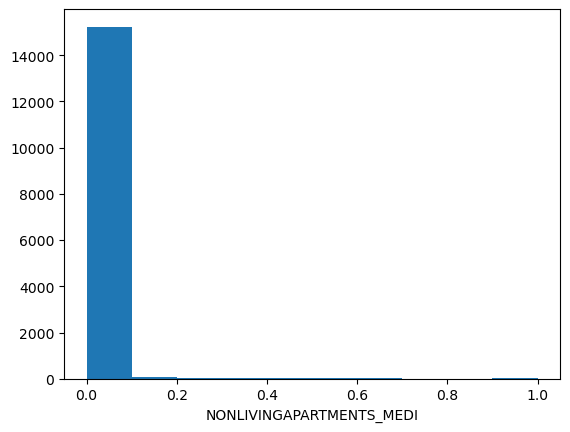

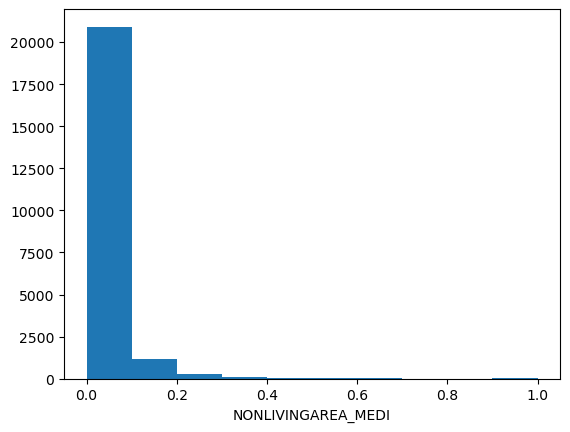

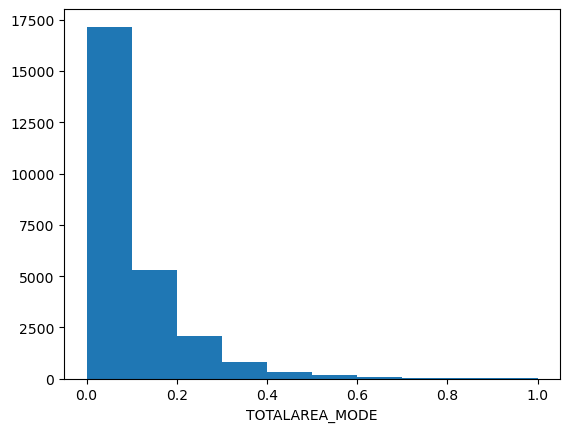

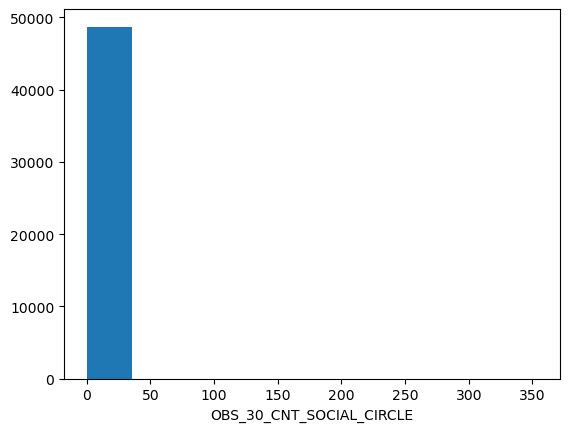

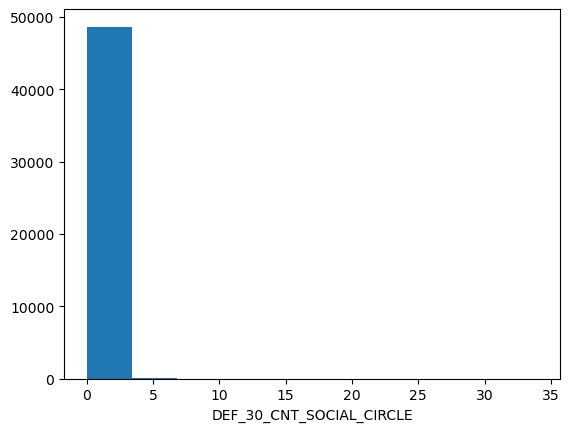

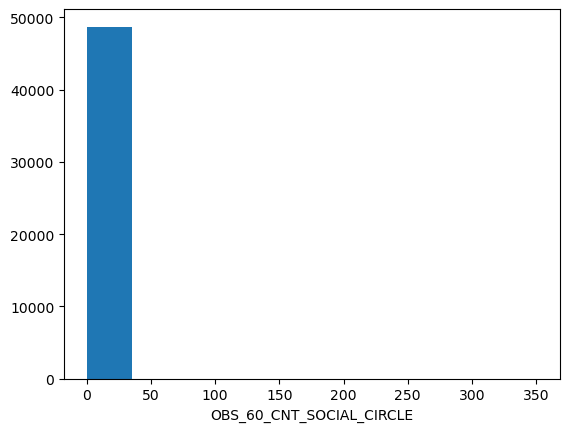

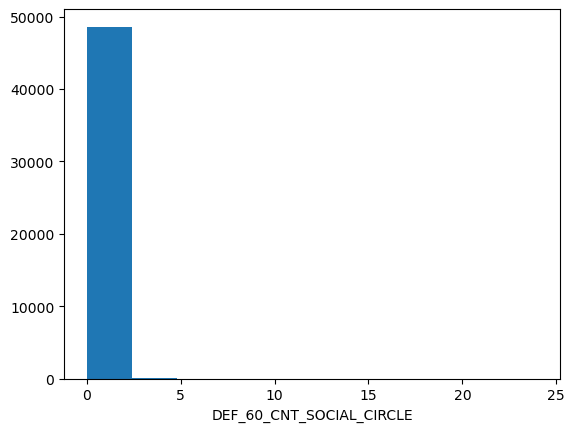

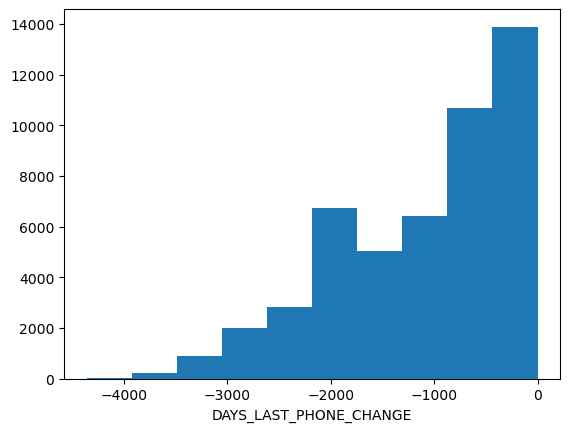

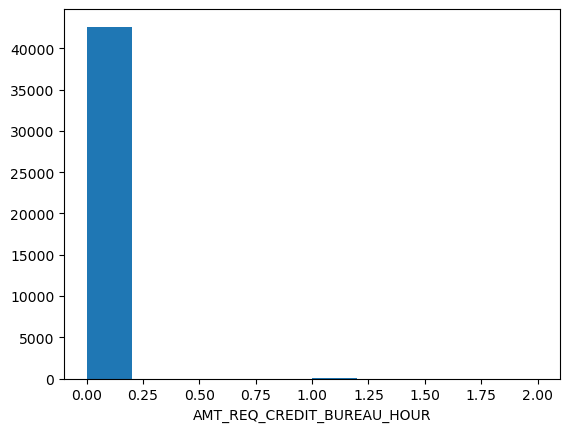

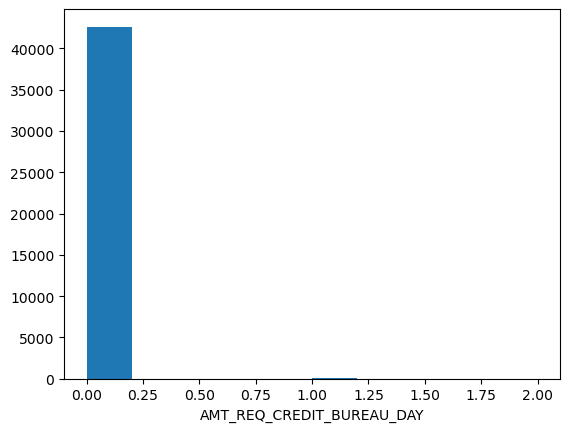

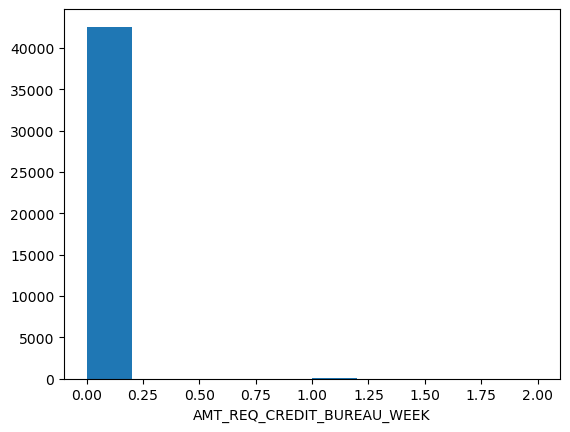

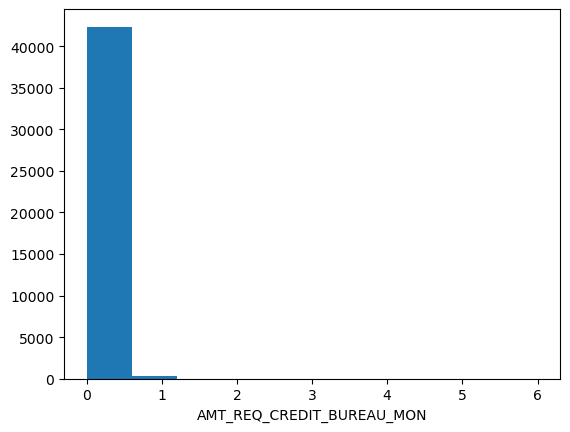

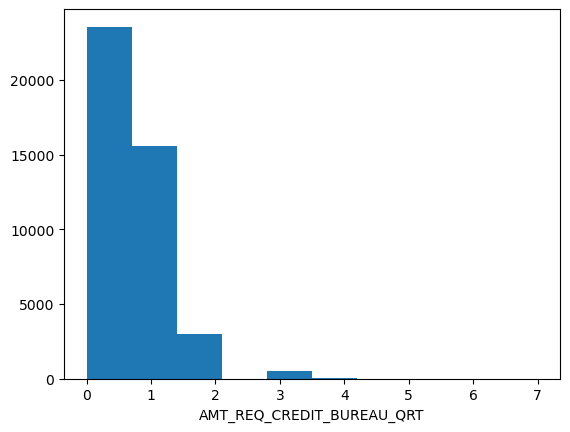

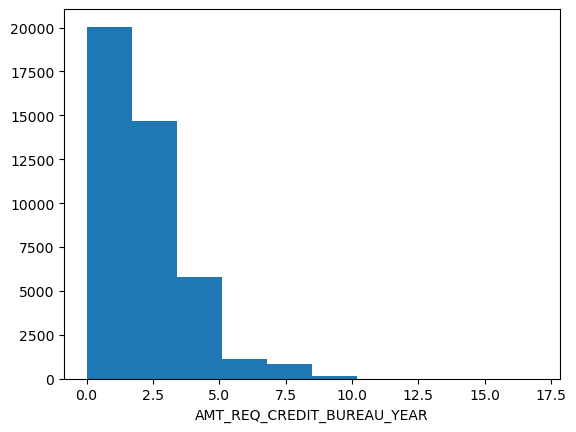

In [51]:
for i in app_test.columns:
    unique_values = app_test[i].unique()
    if i not in cat_var and len(unique_values) > 2:
        plt.hist(app_test[i])
        plt.xlabel(i)
        plt.show()

In [38]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]
    

In [48]:
missing_train = missing_columns(app_train)
missing_train.head(40)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
NONLIVINGAPARTMENTS_MEDI,213514,0.694330,69.4
LIVINGAPARTMENTS_MODE,210199,0.683550,68.4
LIVINGAPARTMENTS_MEDI,210199,0.683550,68.4
LIVINGAPARTMENTS_AVG,210199,0.683550,68.4
FLOORSMIN_MEDI,208642,0.678486,67.8


In [52]:
missing_test = missing_columns(app_test)
missing_test.head(40)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
COMMONAREA_AVG,33495,0.687161,68.7
NONLIVINGAPARTMENTS_AVG,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MEDI,33347,0.684125,68.4
LIVINGAPARTMENTS_AVG,32780,0.672493,67.2
LIVINGAPARTMENTS_MODE,32780,0.672493,67.2
LIVINGAPARTMENTS_MEDI,32780,0.672493,67.2
FLOORSMIN_MODE,32466,0.666051,66.6


In [97]:
X_train = app_train.drop('TARGET', axis=1)  # Features
y_train = app_train['TARGET']  # Target variable
X_test = app_test

In [98]:
# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Fit and transform on the training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Reshape y_train and y_test to 2D arrays if they are 1D
y_train = y_train.values.reshape(-1, 1) if len(y_train.shape) == 1 else y_train
#y_test = y_test.values.reshape(-1, 1) if len(y_test.shape) == 1 else y_test

# Fit and transform on the target data
y_train = imputer.fit_transform(y_train)
#y_test = imputer.transform(y_test)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform on the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit and transform on the target data
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

### Feature Selection

#### Logistic Regression 

In [58]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
coefficients = log_model.coef_
intercept = log_model.intercept_

In [59]:
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")

# Print the intercept
print(f"Intercept: {intercept}")

SK_ID_CURR: -0.019205516783270395
NAME_CONTRACT_TYPE: -0.07680268256636011
CODE_GENDER: 0.7450461903335617
FLAG_OWN_CAR: -0.29969349550100627
FLAG_OWN_REALTY: 0.03579456395980895
CNT_CHILDREN: 1.1453334559869743
AMT_INCOME_TOTAL: 0.08375421357109096
AMT_CREDIT: 2.716104511616072
AMT_ANNUITY: 3.051804706631805
AMT_GOODS_PRICE: -4.38901304337051
NAME_TYPE_SUITE: 0.041245803551711105
NAME_INCOME_TYPE: 0.12042321736829516
NAME_EDUCATION_TYPE: 0.4931789955386138
NAME_FAMILY_STATUS: -0.08506232010528271
NAME_HOUSING_TYPE: 0.057007390562200076
REGION_POPULATION_RELATIVE: 0.06869576704180272
DAYS_BIRTH: 0.030460019230711642
DAYS_EMPLOYED: 0.682974889210963
DAYS_REGISTRATION: 0.3230721282882219
DAYS_ID_PUBLISH: 0.3454525184328949
OWN_CAR_AGE: 0.5662921459115132
FLAG_MOBIL: -0.7342432202324497
FLAG_EMP_PHONE: 0.8129437465272366
FLAG_WORK_PHONE: 0.12975807975525128
FLAG_CONT_MOBILE: -0.11264000662866419
FLAG_PHONE: -0.08223984217125756
FLAG_EMAIL: -0.09901380302246376
OCCUPATION_TYPE: 0.040463511

In [60]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients.flatten()})
feature_importance['AbsoluteCoefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='AbsoluteCoefficient', ascending=False)
feature_importance = feature_importance.reset_index()
feature_importance.head(30)

,index,Feature,Coefficient,AbsoluteCoefficient
0,9,AMT_GOODS_PRICE,-4.389013,4.389013
1,8,AMT_ANNUITY,3.051805,3.051805
2,93,DEF_60_CNT_SOCIAL_CIRCLE,2.951234,2.951234
3,91,DEF_30_CNT_SOCIAL_CIRCLE,2.819370,2.819370
4,7,AMT_CREDIT,2.716105,2.716105
5,42,EXT_SOURCE_3,-2.379486,2.379486
6,41,EXT_SOURCE_2,-1.769159,1.769159
7,118,AMT_REQ_CREDIT_BUREAU_MON,-1.603710,1.603710
8,106,FLAG_DOCUMENT_13,-1.218915,1.218915
9,28,CNT_FAM_MEMBERS,-1.169884,1.169884


#### Elastic Net

Important Features:
CNT_CHILDREN
AMT_INCOME_TOTAL
DAYS_EMPLOYED
FLAG_MOBIL
FLAG_CONT_MOBILE
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
LIVE_REGION_NOT_WORK_REGION
LIVE_CITY_NOT_WORK_CITY
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
COMMONAREA_MODE
ELEVATORS_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
HOUSETYPE_MODE
TOTALAREA_MODE
OBS_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_7
FLAG_DOCUM

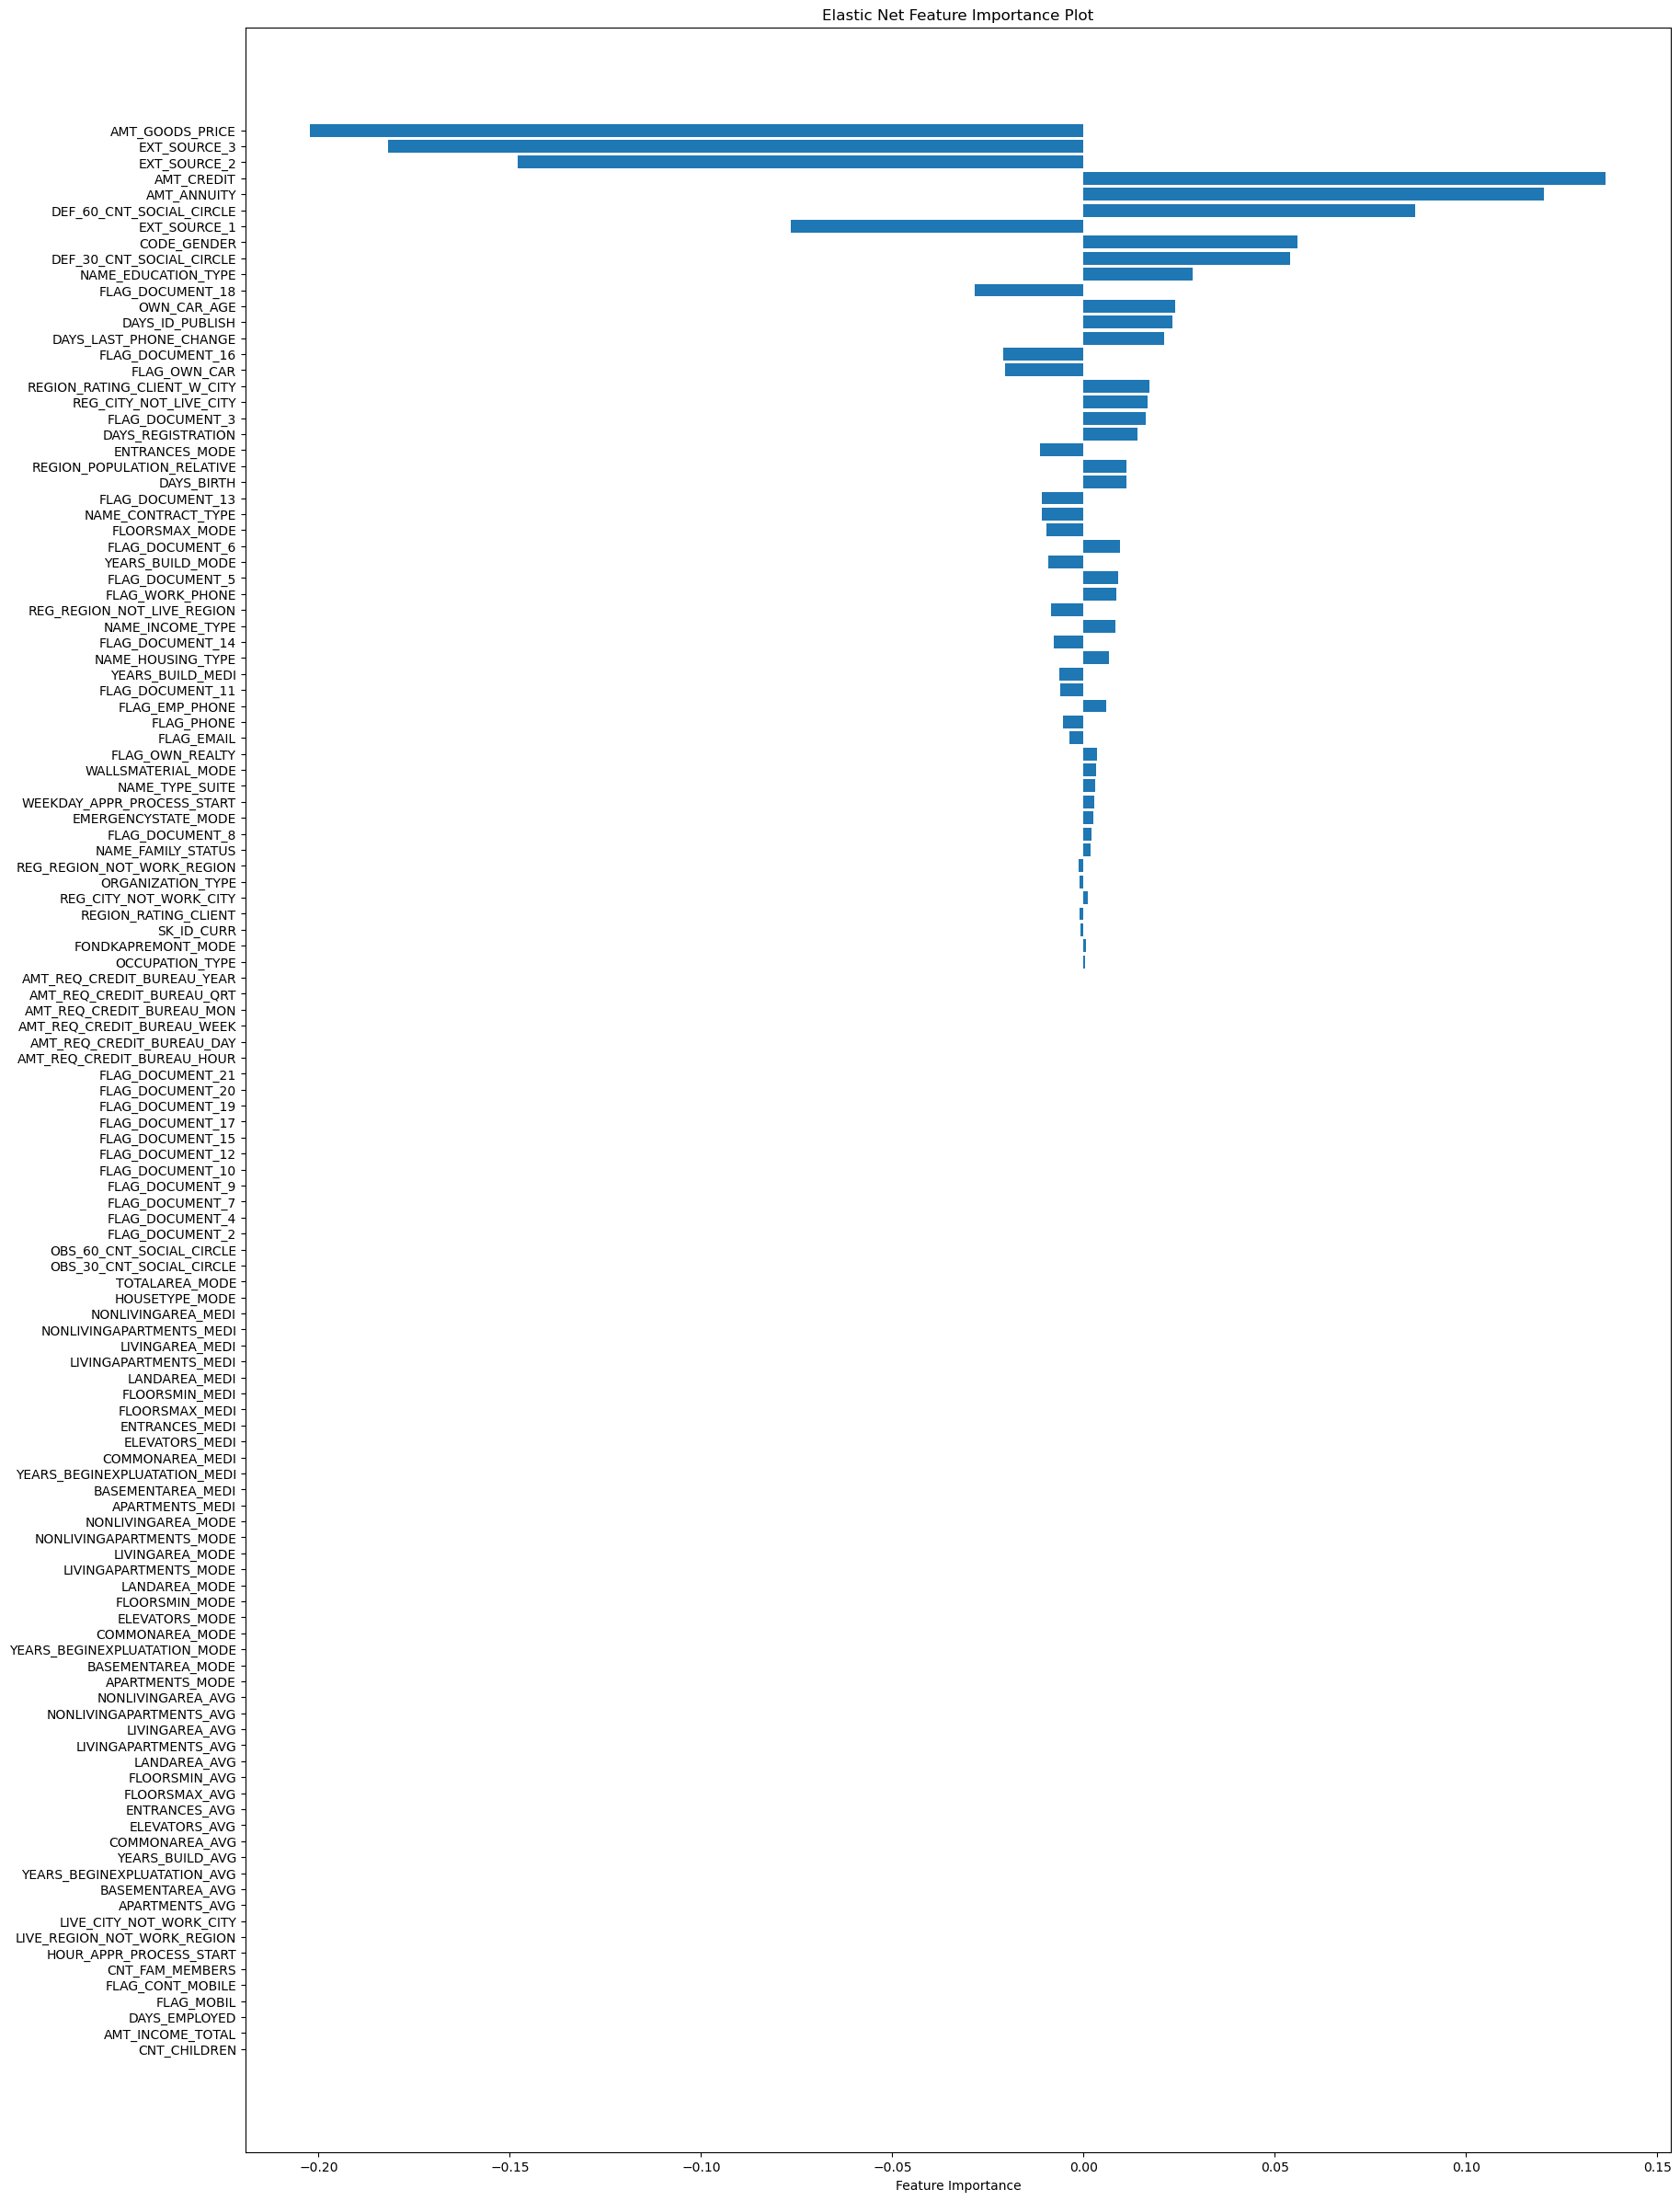

In [86]:
# Create and fit Elastic Net model
elastic_net = ElasticNet(alpha=0.0001, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Get feature importance
feature_importance = elastic_net.coef_

# Sort features by importance
sorted_features = sorted(zip(app_test.columns, feature_importance), key=lambda x: abs(x[1]))

# Extract sorted feature names and importance values
sorted_feature_names, sorted_importance = zip(*sorted_features)

# Print the sorted feature names and their importance values
important_features_list = list(sorted_feature_names)
print("Important Features:")
for feature in important_features_list:
    print(feature)

# Plotting Feature Importance 
plt.figure(figsize=(20, 30))
plt.barh(range(len(sorted_feature_names)), sorted_importance)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Elastic Net Feature Importance Plot')
plt.show()

In [87]:
selected_feature = important_features_list[-30:]
selected_feature

['FLAG_WORK_PHONE',
 'FLAG_DOCUMENT_5',
 'YEARS_BUILD_MODE',
 'FLAG_DOCUMENT_6',
 'FLOORSMAX_MODE',
 'NAME_CONTRACT_TYPE',
 'FLAG_DOCUMENT_13',
 'DAYS_BIRTH',
 'REGION_POPULATION_RELATIVE',
 'ENTRANCES_MODE',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_16',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_DOCUMENT_18',
 'NAME_EDUCATION_TYPE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'CODE_GENDER',
 'EXT_SOURCE_1',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_GOODS_PRICE']

In [99]:
app_train_select = app_train.loc[:, selected_feature]
app_test_select = app_test.loc[:, selected_feature]

In [101]:
X_train_select = app_train_select
X_test_select = app_test_select

In [102]:
# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Fit and transform on the training data
X_train_select = imputer.fit_transform(X_train_select)
X_test_select = imputer.transform(X_test_select)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform on the training data
X_train_select = scaler.fit_transform(X_train_select)
X_test_select = scaler.transform(X_test_select)


In [108]:
X_train_select.shape

(307511, 30)

In [109]:
X_test_select.shape

(48744, 30)

### Model Training

#### LDA

In [111]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_select, y_train)
y_pred_lda = lda.predict(X_test_select)
prediction_scores = lda.predict_proba(X_test_select)

In [119]:
#Calculate Nonconformity Scores
nonconformity_scores = 1 - prediction_scores.max(axis=1)

#Calculate Nonconformity Scores
ranked_indices = np.argsort(nonconformity_scores)

#Define significance_level = 0.05
significance_level = 0.05

#Predict interval
lower_bound_index = int(significance_level * len(ranked_indices))
upper_bound_index = len(ranked_indices) - lower_bound_index
prediction_interval = (nonconformity_scores[ranked_indices[lower_bound_index]],
                       nonconformity_scores[ranked_indices[upper_bound_index]])


In [120]:
prediction_interval

(0.015391067895646815, 0.2556419279879426)